# <a id="1"></a>
<div style="text-align: center; background-color: #CABD80; font-size:100%; padding: 5px;border-radius:10px 10px;">
    <h1>  Part 0: Project Introduction</h1>
</div> <a id="1"></a>



<div style="background-color: #FCFFE9; padding: 10px;">

- **Goal** - What problem to solve?  <br>
  - In the business context, understanding customers is crucial. This project focuses on **customer segmentation analysis using the KMeans unsupervised learning method**. The objective is to categorize customers into distinct groups based on various characteristics and behaviors, aiming to uncover unique needs and pain points within each segment. The ultimate goal is to provide **actionable recommendations** aligned with the specific preferences and characteristics identified in each customer segment
- **ML approach**?
  - For clustering, the unsupervised **KMeans** method will be employed. While other clustering methods could be considered, because lots of analysis happens post-modeling for this project, I will only focus on KMeans for simplicity. 
    
  - Since KMeans is vulnerable to curse of dimensionality, we will do lots of **feature selection/engineering** including **PCA**.  
    
    
- **Model tuning for unsupervised learning**?
  - Unsupervised learning don't have labels. In this project, tuning happens in the following areas:
    
    - **Scaling**: although technically not tuning, scaling is key for KMeans performance. With the help of PCA visualization, a comparison of MinMax and Standard scaling will be conducted.
    
    - **PCA Dimensions**: will be determined using variance analysis, principal component coefficients analysis, and consideration of business interests. 
    - **Number of Clusters**: will be determined using elbow method with a practical analysis based on resutling clustering groups.
    
    


  

# <a id="2"></a>
<div style="text-align: center; background-color: #CABD80; font-size:100%; padding: 5px;border-radius:10px 10px;">
    <h1>Part 1: Exploratory Data Analysis (EDA)</h1>
</div>


# <a id="3"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2>Part 1.1: Import Files and Load Data</h2>
</div>


<a id='top'></a>

In [1]:
# Import Files
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr
from yellowbrick.cluster import KElbowVisualizer
from sklearn.exceptions import ConvergenceWarning

In [2]:
data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t') 

# <a id="4"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2>Part 1.2: Basic data inspectations</h2>
</div>

In [3]:
# Basic data inspections
pd.set_option('display.max_columns', None)
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
# some basic informations (data size, column types)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Take a look at some statistics. Since there are many columns, I break down the output by 2 parts.

In [5]:
# Some statistics (part1)
data.loc[:,'Education':'MntGoldProds'].describe(include='all').style.background_gradient(cmap='Greys')

In [6]:
# Some statistics (part2)
data.loc[:,'NumDealsPurchases':].describe(include='all').style.background_gradient(cmap='Greys')

In [7]:
# Check dups, or NAs
print('duplicates: ',data.duplicated().sum())
print('NAs: \n', data.isna().sum())

duplicates:  0
NAs: 
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<div style="background-color: #FFF2CC; padding: 10px;">
<span style="font-size: larger;">
    
- Dataset has **2240 rows** and **29 columns**.

- As described, dataset has attributes in 4 areas: people, products, promotions, and places.

- Columns like **'Z_CostContact'** and **'Z_Revenue'** have same values and provide no useful information. They can be safely deleted.

- **'Income'** has 24 **null values**.

- **'Dt_Customer'** is in object format and needs to be converted. 

In [8]:
# people
data.get(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain'])

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  Complain  
0            0  04-09-2012       58         0  
1            1  08-03-2014       38         0  
2            0  21-08-2013       26         0  
3            0  10-02-2014       26         0  
4            0  19-01-2014       94         0  
...        ...         ...      ...       ...  
2235         1  13-06-2013       46         0  
2236         1  10-06-2014       56         0  
2237         0  25-01-2014       91         0  
2238         1  24-01-2014        8         0  
2239         1  15-10-2012       40         0  

[2240 rows x 10 columns]

In [9]:
# products
data.get(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2240 rows x 6 columns]

In [10]:
# promotion
data.get(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  2             0             0             0   
2236                  7             1             0             0   
2237                  1             0             0             0   
2238                  2             0             0             0   
2239                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  
0                0             0         1  
1                0             0         0  
2                0             0         0  
3                0             0         0  
4                0             0         0  
...            ...           ...       ...  
2235             0             0         0  
2236             0             0         0  
2237             1             0         0  
2238             0             0         0  
2239             0             0         1  

[2240 rows x 7 columns]

In [11]:
# place
data.get(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  
0                     7  
1                     5  
2                     4  
3                     6  
4                     5  
...                 ...  
2235                  5  
2236                  7  
2237                  6  
2238                  3  
2239                  7  

[2240 rows x 4 columns]

# <a id="5"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 1.3: Deeper EDA, data cleaning, and new features</h2>
</div>


# <a id="6"></a>
<div style="text-align: center; background-color: #FDE0D9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.1: Get rid of N/As and irrelevants</h2>
</div>

#### Drop NAs

In [12]:
# Drop columns "Z_CostContact" and "Z_Revenue". They aren't meaningful since all entries are the same.
data.drop(["Z_CostContact" , "Z_Revenue"] ,axis=1, inplace=True)

# Drop "ID" also, they aren't useful. 
data.drop(["ID"] ,axis=1, inplace=True)

In [13]:
# We've known there are 24 records with null values.Take a look.
data[data['Income'].isnull()].sample(5)

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
312         1989  Graduation        Married     NaN        0         0   
90          1957         PhD        Married     NaN        2         1   
2081        1955  Graduation         Single     NaN        0         1   
2079        1954      Master       Together     NaN        0         1   
1386        1972         PhD       Together     NaN        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
312   03-06-2013       69       861        138              461   
90    19-11-2012        4       230         42              192   
2081  18-10-2013       95       264          0               21   
2079  23-06-2013       83       161          0               22   
1386  02-03-2014       17        25          1               13   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
312                60                30            61                  1   
90                 49                37            53                 12   
2081               12                 6           147                  3   
2079                0                 0            24                  2   
1386                0                 0             3                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
312                 6                    5                 12   
90                  7                    2                  8   
2081                6                    1                  5   
2079                4                    1                  4   
1386                1                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
312                   3             0             1             0   
90                    9             0             0             0   
2081                  7             0             0             0   
2079                  6             0             0             0   
1386                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
312              1             0         0         0  
90               0             0         0         0  
2081             0             0         0         0  
2079             0             0         0         0  
1386             0             0         0         0

In [14]:
# Seems there are nothing special about them. Since there aren't many, exclude them.
data.dropna(subset=['Income'],axis=0, inplace=True)

# Check number of records left
data.shape

(2216, 26)

# <a id="7"></a>
<div style="text-align: center; background-color: #FDE0D9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.2: Datetime and new features</h2>
</div>


#### 'DT_Customer' feature

In [15]:
# Convert 'Dt_customer' to datetime type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y")
# Check data type after converting
print('Dt_Customer type: ',data["Dt_Customer"].dtype)

Dt_Customer type:  datetime64[ns]


In [16]:
# To create seniority, we need to find a reasonable point of time for calculation so we dive in  the 'Dt_Customer' field a bit

# Check the earliest and latest date time
print('Earliest customer enrollment date: ', data['Dt_Customer'].min())
print('latiest customer enrollment date: ', data['Dt_Customer'].max())

Earliest customer enrollment date:  2012-07-30 00:00:00
latiest customer enrollment date:  2014-06-29 00:00:00


#### Create 'Seniority' feature
Okay, Dt_Customer' ranges from around mid of 2012 to 2014. 
I think using latest customer enrollment date as the date point for calculation is reasonable. I would like to use it in weeks.

In [17]:
# Create 'Seniority'(in weeks) feature. 
last_date =  data['Dt_Customer'].max()
data['Seniority'] = (last_date -data['Dt_Customer']).dt.days/7

# Take a look to make sure calculation is correct
data[['Dt_Customer','Seniority' ]].head(2)

# 'Dt_Customer' is now redundant. Remove
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [18]:
# Create 'Age' feature.
# I am not sure when the data is collected but it could be in 2021. Let's just use 2021 as 'today' to calculate the age.
today = 2021
data['Age'] = today - data['Year_Birth']

# 'Year_Birth' is now redundant. Remove
data.drop(['Year_Birth'], axis=1, inplace=True)

# <a id="8"></a>
<div style="text-align: center; background-color: #FDE0D9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.3: Discrete and continuous features</h2>
</div>

In [19]:
# Divide features by discrete and continuous

# Function to seperate discrete and continuous features in original data (won't work after PCA or Clustering)
def divide_feature_types(data):
        '''
        inpute a data frame and output continuous, and discrete feature columns in list format
        '''
        # Initialize
        col_cont=[] 
        col_dis=[] 
        # loop through and seperate columns
        for c in data.columns: 
            if ('home' in c) or ('Num' in c) or ('Accepted' in c) or (c=='Complain') or (c=='Response'): 
                col_dis.append(c)
            elif (data[c].dtype=='O'):
                col_dis.append(c)
            else:
                col_cont.append(c)
        return col_cont, col_dis

# Call the function and get column lists
col_cont, col_dis = divide_feature_types(data)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)

Continuous numerical features:  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Seniority', 'Age']
Categorical or discrete features:  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


# <a id="9"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 1.4: Data visualization and analysis</h2>
</div>

<div style="text-align: center; background-color: #FCFFE9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Continuous Features </h2>
</div>

### Histogram and kdeplot to check overall distribution first.

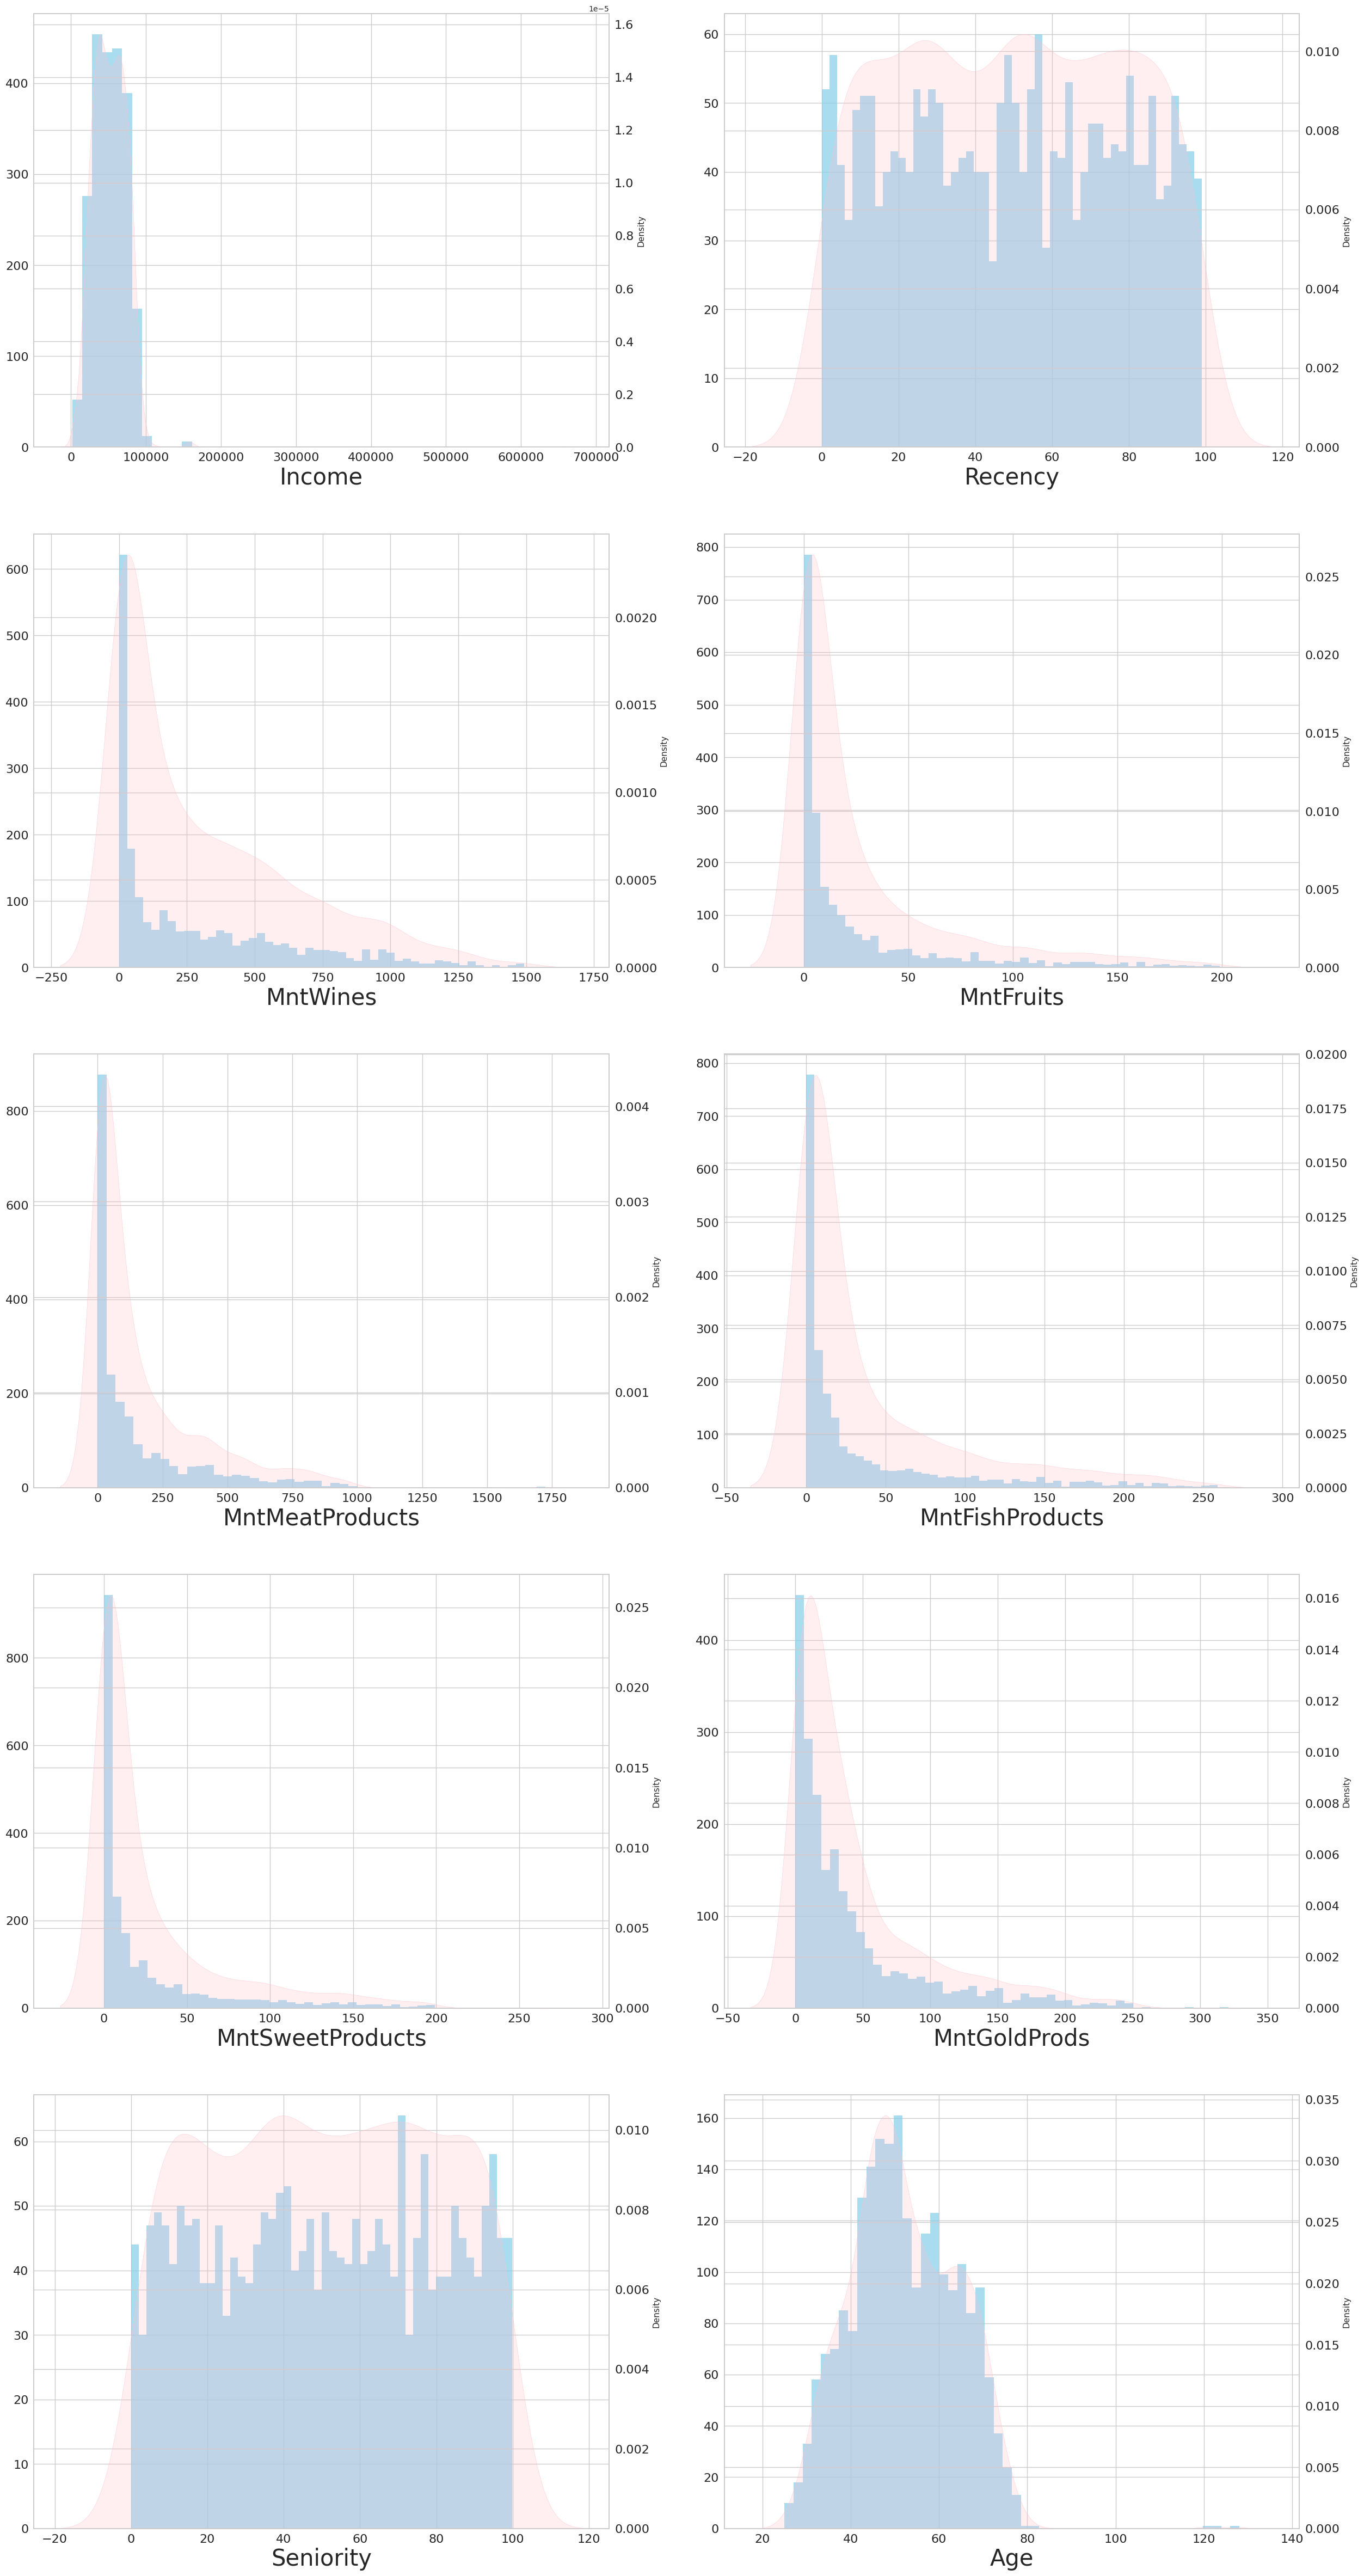

In [20]:
# Histogram and kdeplot for all continuous features 
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont) // grh_per_row , grh_per_row, figsize=(30, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram on the primary y-axis
    ax[row, col].hist(data_copy[feature], bins=50, alpha=0.7, color='skyblue', label='Histogram')
    ax[row, col].set_xlabel(feature, fontsize=30)
#     ax[row, col].set_ylabel("Histogram Count", color='blue', fontsize=30)
#     ax[row, col].legend(loc='upper left', fontsize=30)
    
    # Plot KDE plot on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(data_copy[feature], fill=True, color='pink', ax=ax2, label='KDE Plot')
#     ax2.set_ylabel("KDE Density", color='red', fontsize=30)
#     ax2.legend(loc='upper right', fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)

plt.show()

#### Seems income and age follow sort of some normal distributions. That's good. Overall, customers seem to be mostly mid age to senior. Seniority and recency seems to be quite uniform with some high and lows but nothing too strange. For amounts purchased (fields start with 'Mnt'), the distribution lean and concentrate at the very low (near 0) end. This could be something we need to dig. 
#### Next, I want to see  how the distribution of continuous features vary by some discrete features. Let's take a look at some boxplot by education, marital status, kidhome, teenhome.

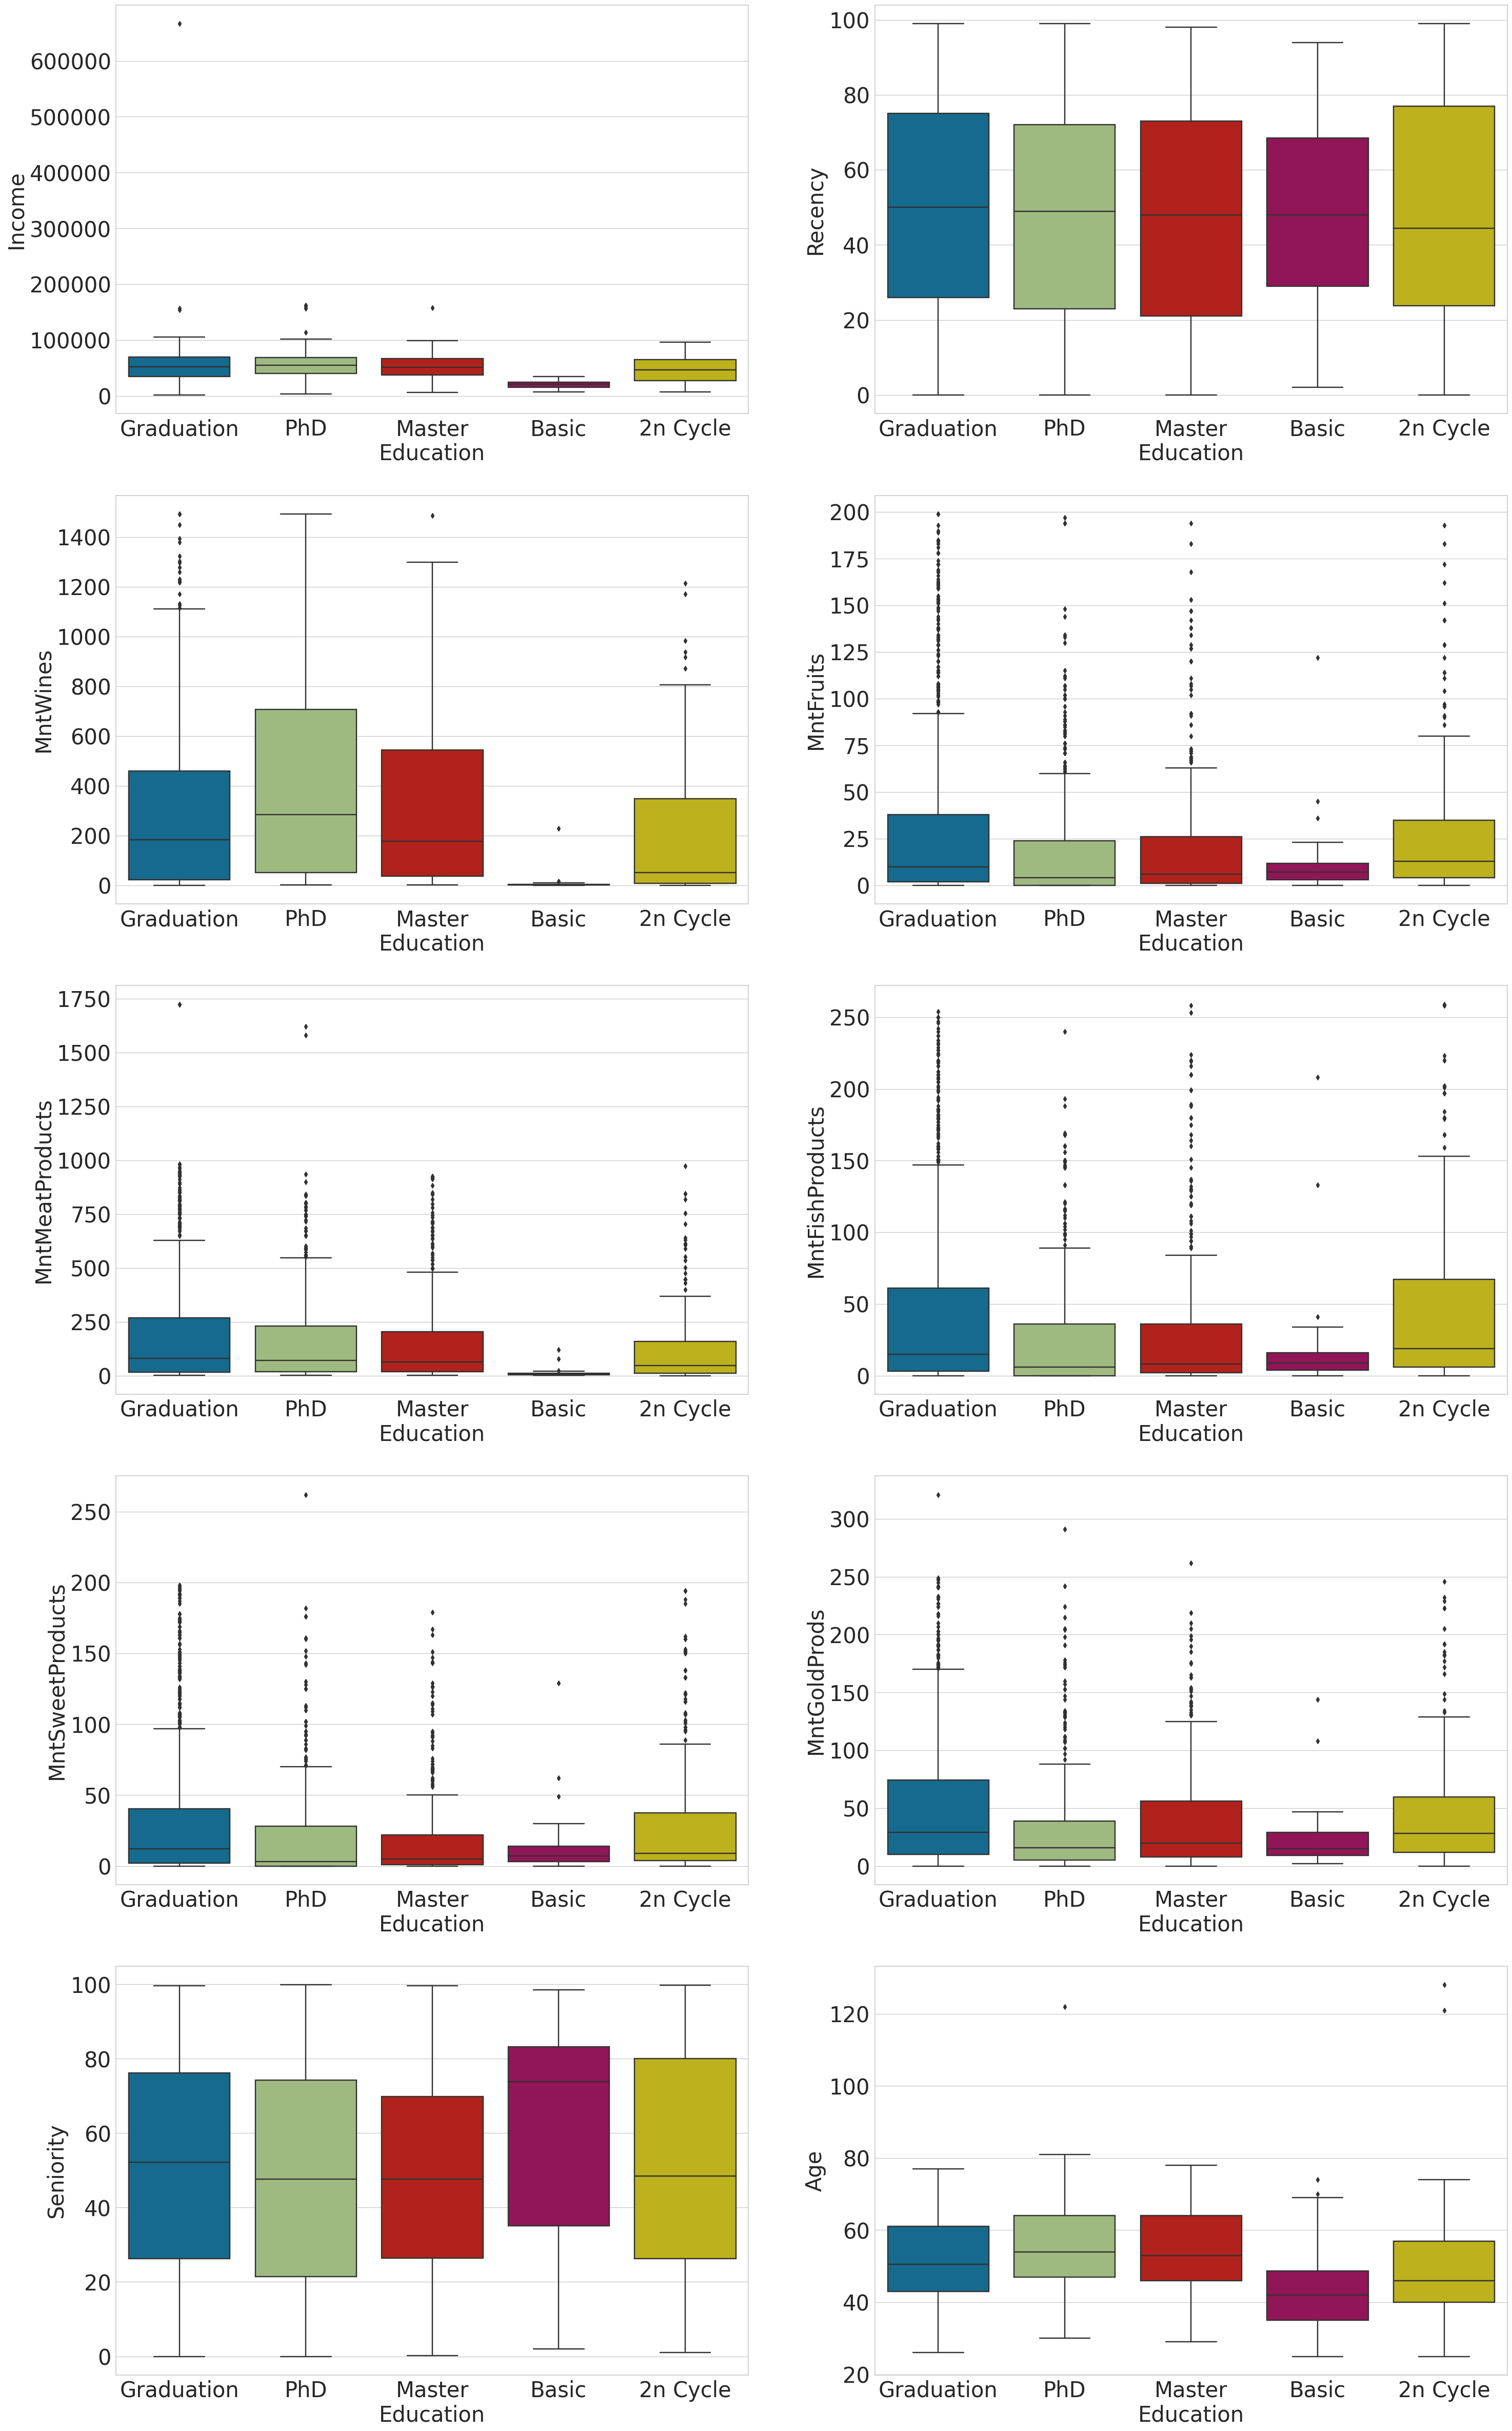

In [21]:
# Boxplot for all continuous features - by education
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row, grh_per_row, figsize=(35, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    sns.boxplot(x='Education', y=feature, data=data_copy, ax=ax[row, col])

    # Set labels and axis labels font size
    ax[row, col].set_xlabel('Education', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30)

plt.show()

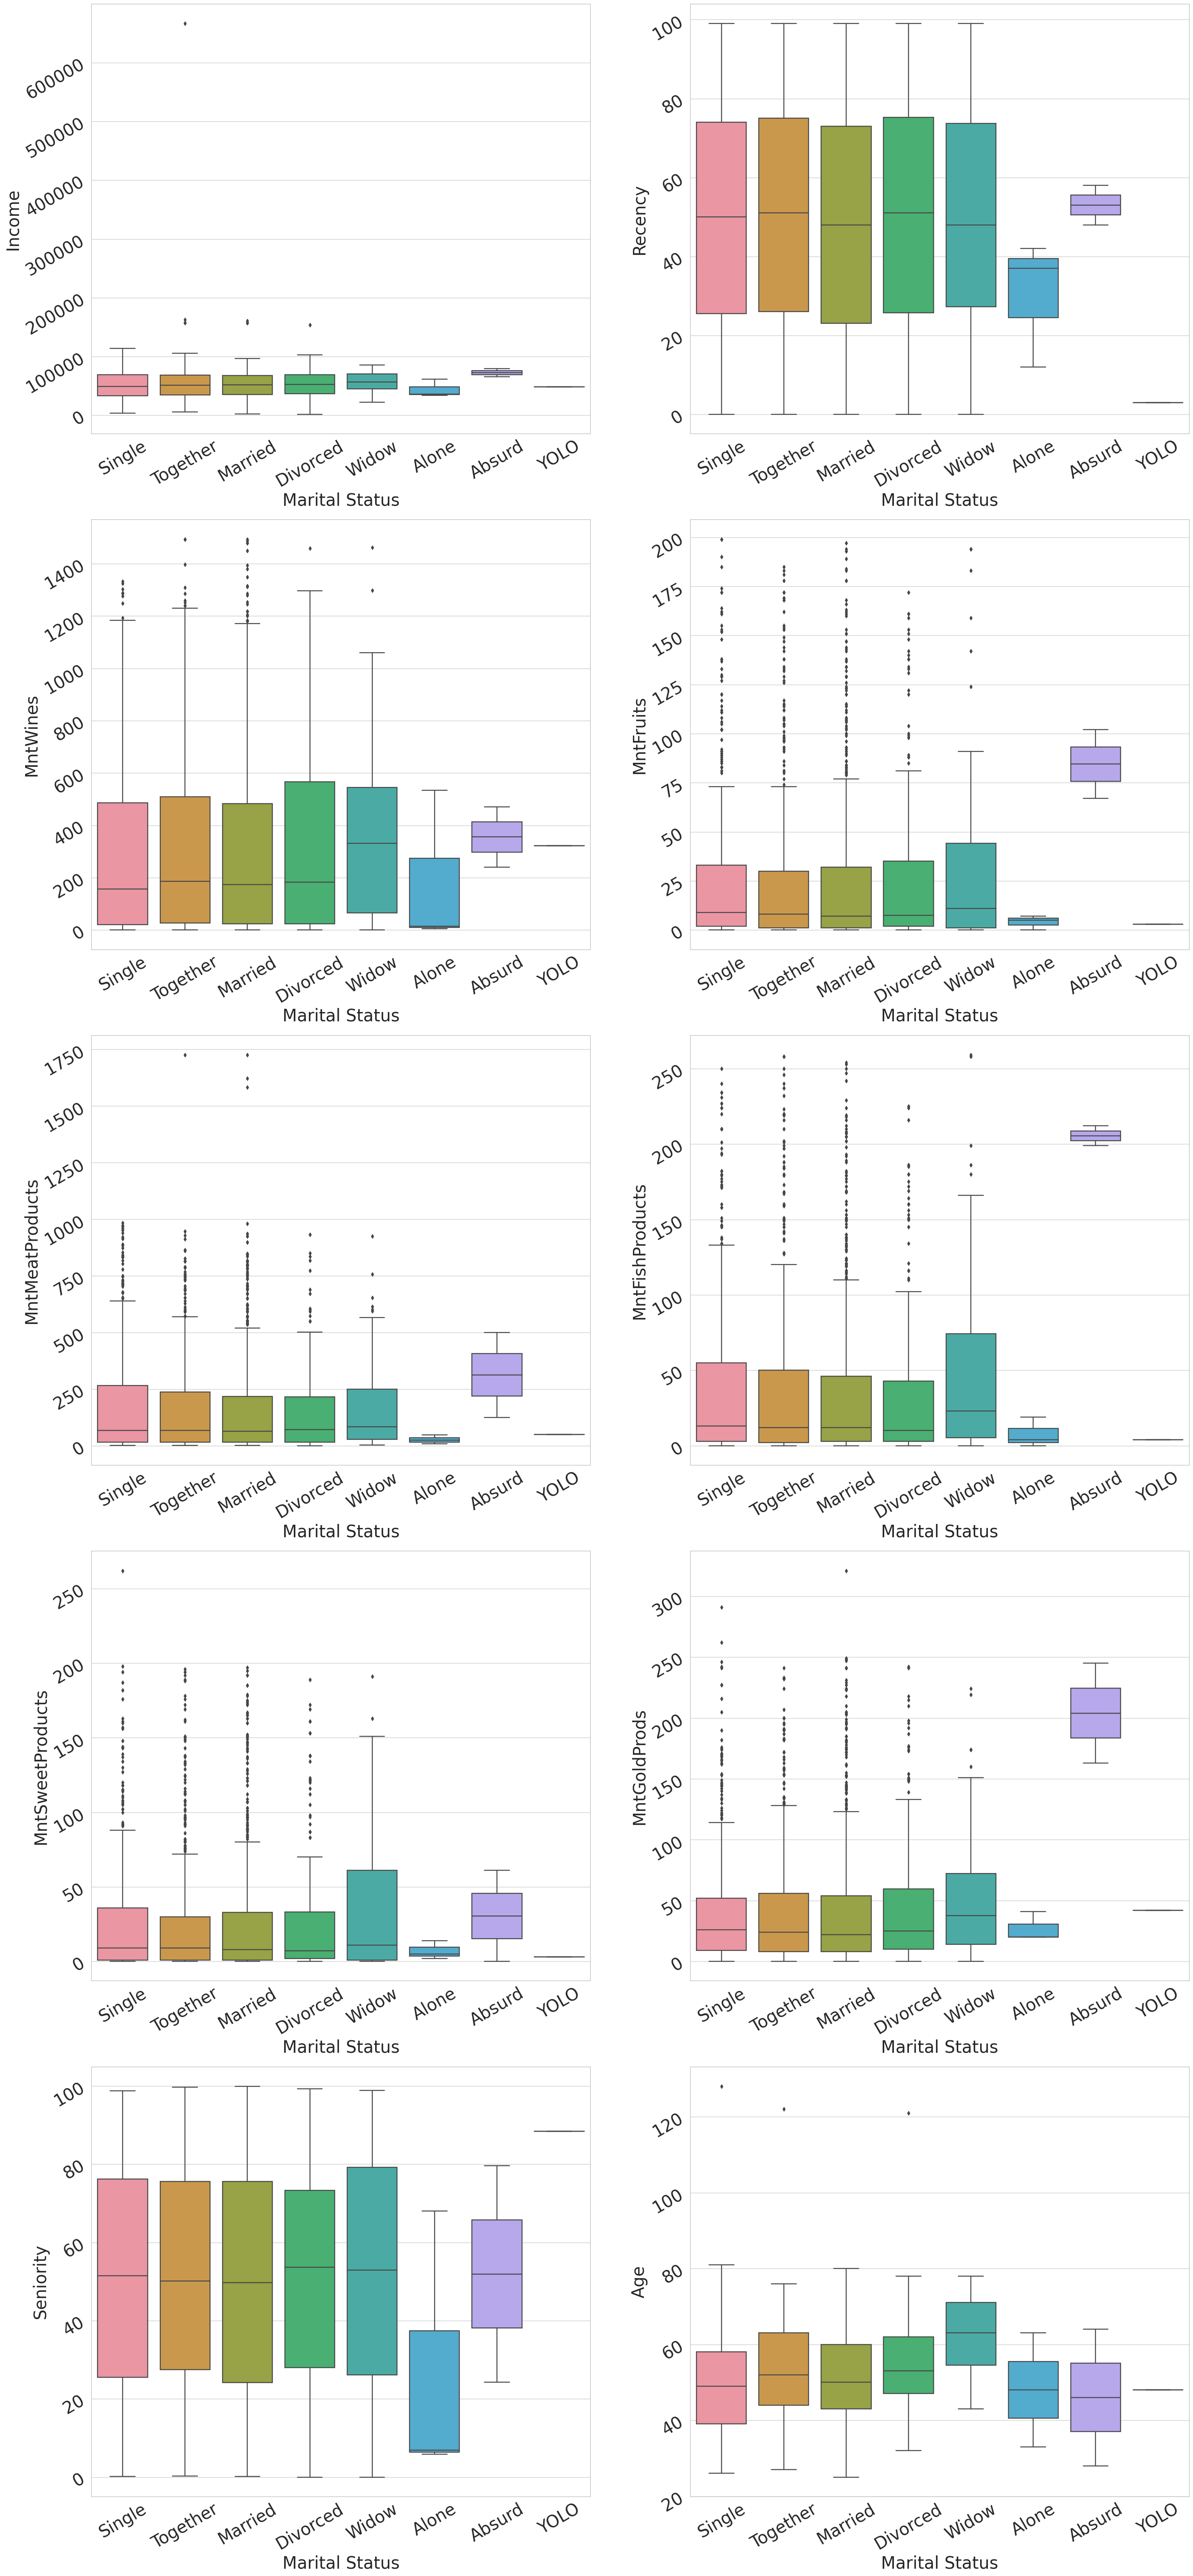

In [22]:
#  Boxplot for all continuous features - by marital status
grh_per_row =2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 80))

for count, feature in enumerate(col_cont, 0):
    data_copy= data.copy()
    row =count // grh_per_row
    col=(count )% grh_per_row    
    sns.boxplot(x='Marital_Status', y=feature, data=data_copy, ax=ax[row, col])
        
    # Set labels and axis labels font size
    ax[row, col].set_xlabel('Marital Status', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30, rotation=30)

plt.show()

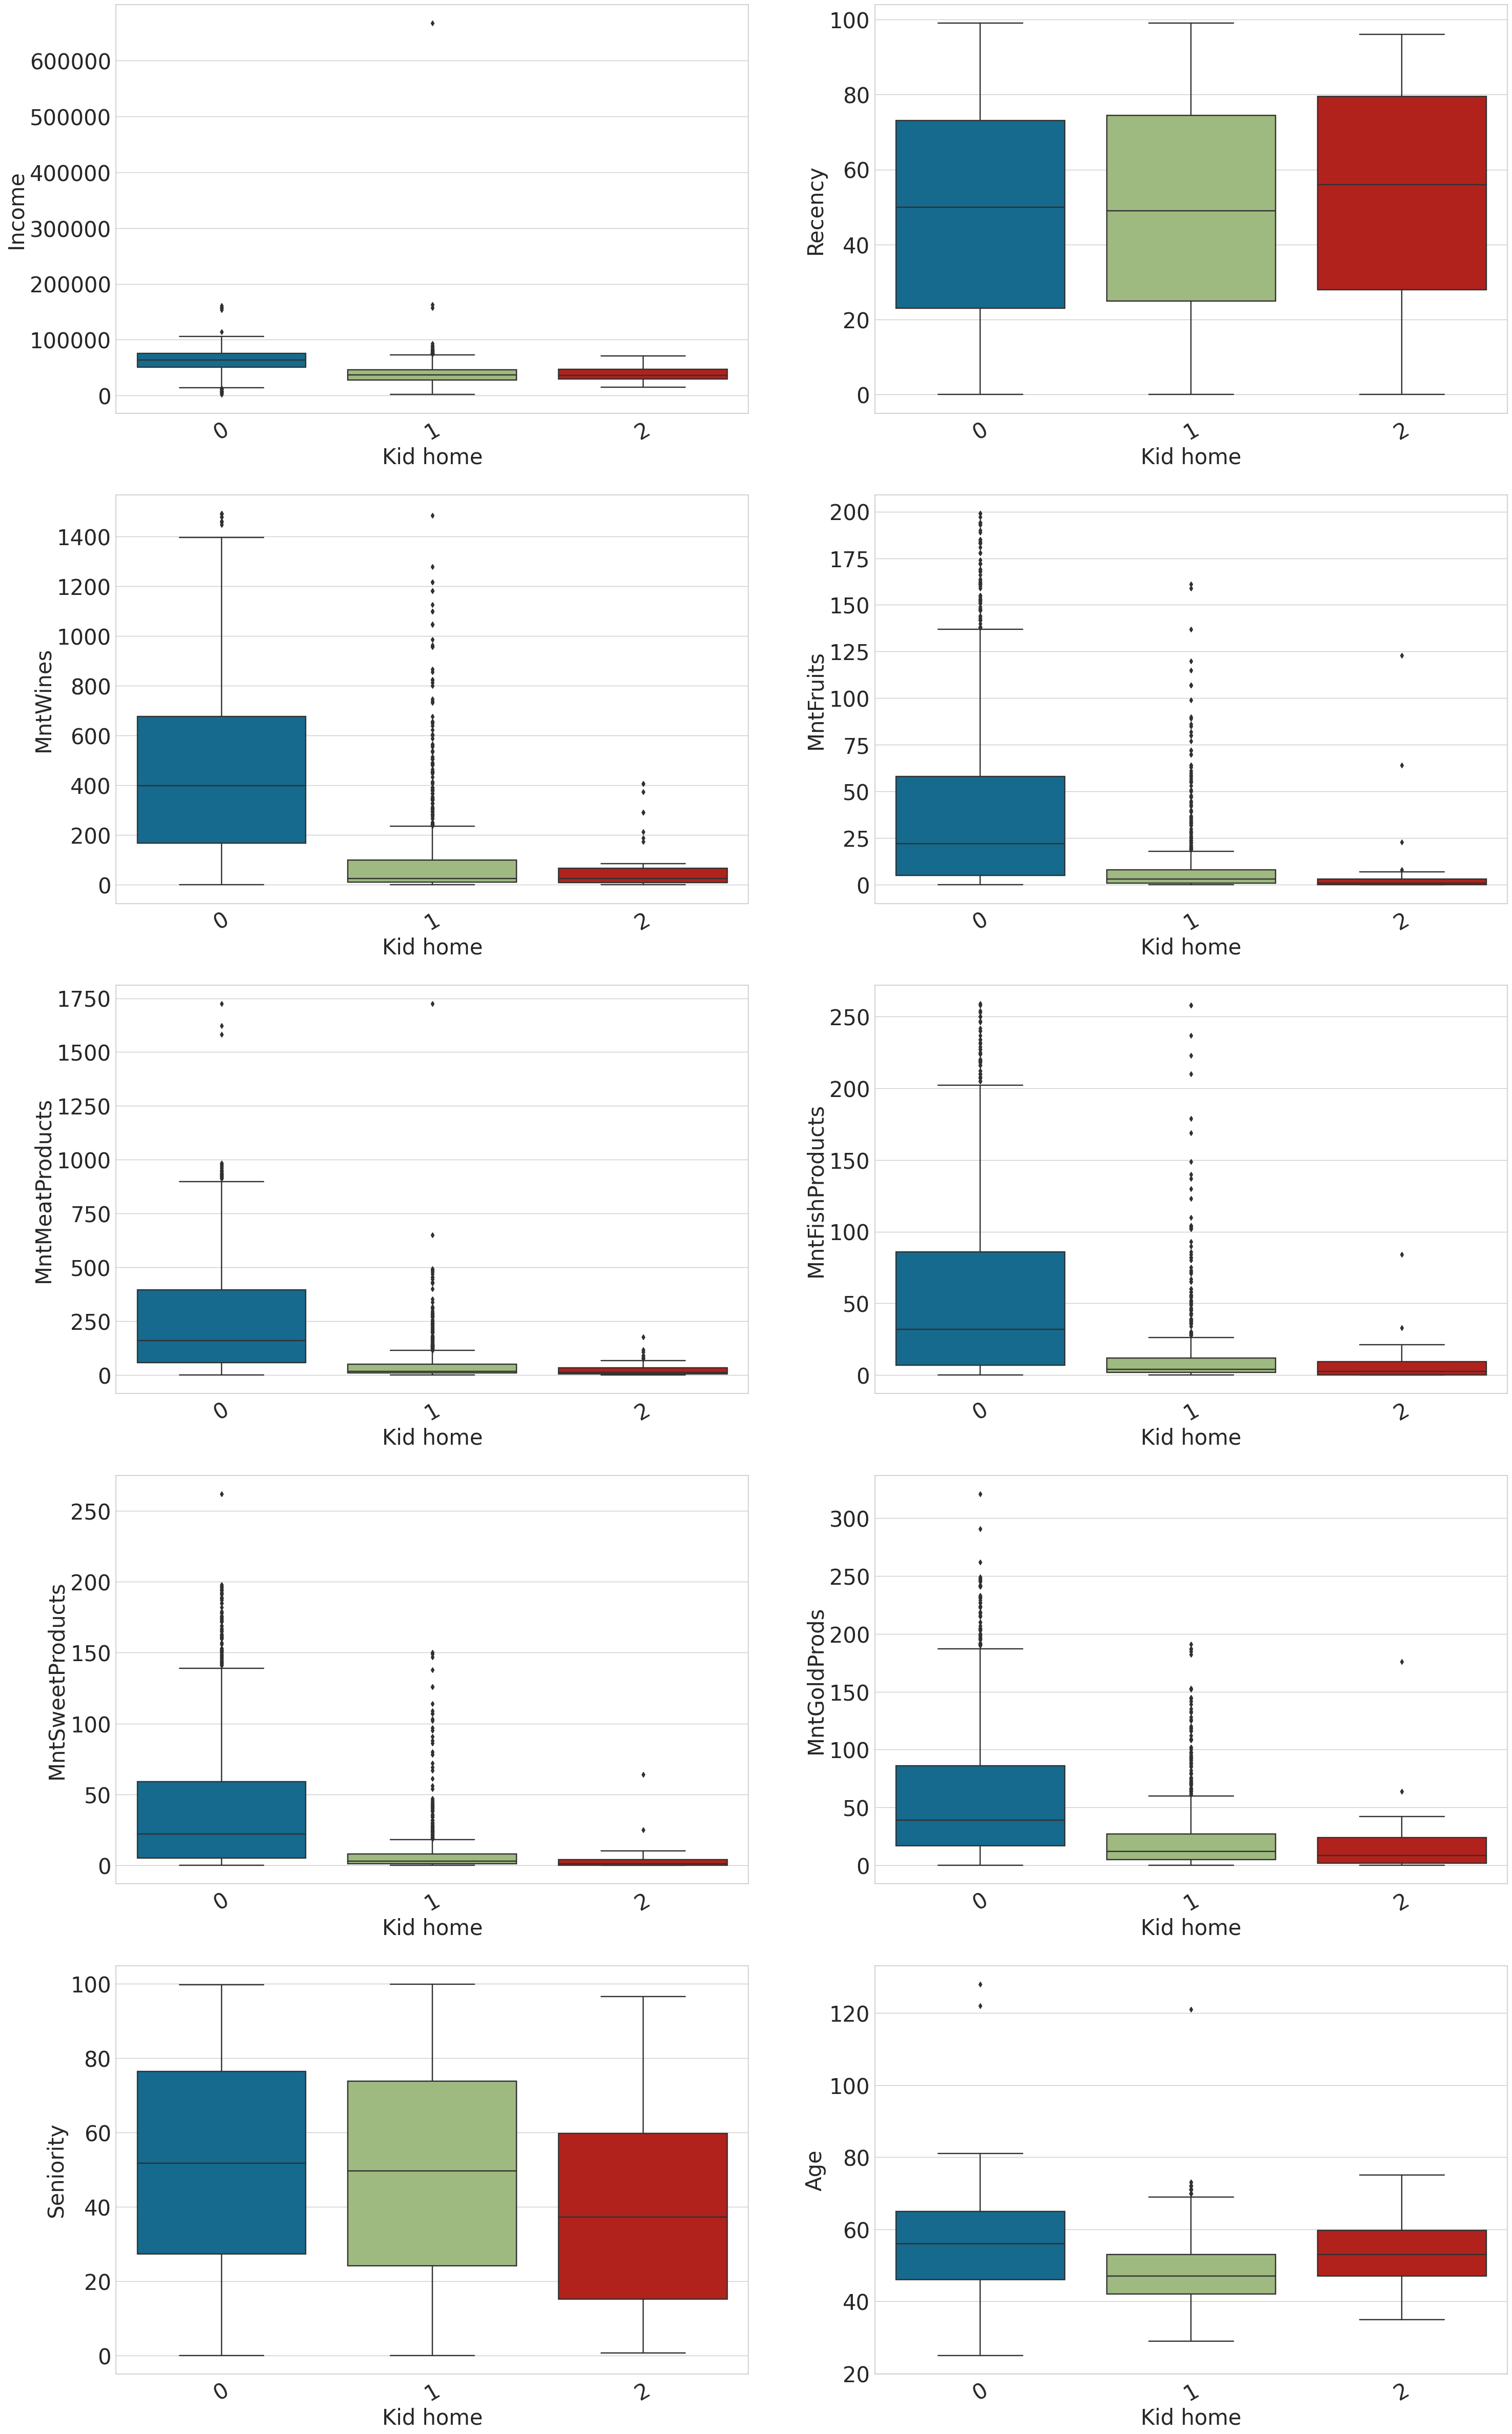

In [23]:
#  Boxplot for all continuous features - by Kidhome
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy= data.copy()
    row =count // grh_per_row
    col=(count )% grh_per_row    
    sns.boxplot(x='Kidhome', y=feature, data=data_copy, ax=ax[row, col])
    ax[row, col].tick_params(axis='x', rotation=30)  # Rotate x-axis labels
        
    # Set labels and axis labels font size
    ax[row, col].set_xlabel('Kid home', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30)
plt.show()

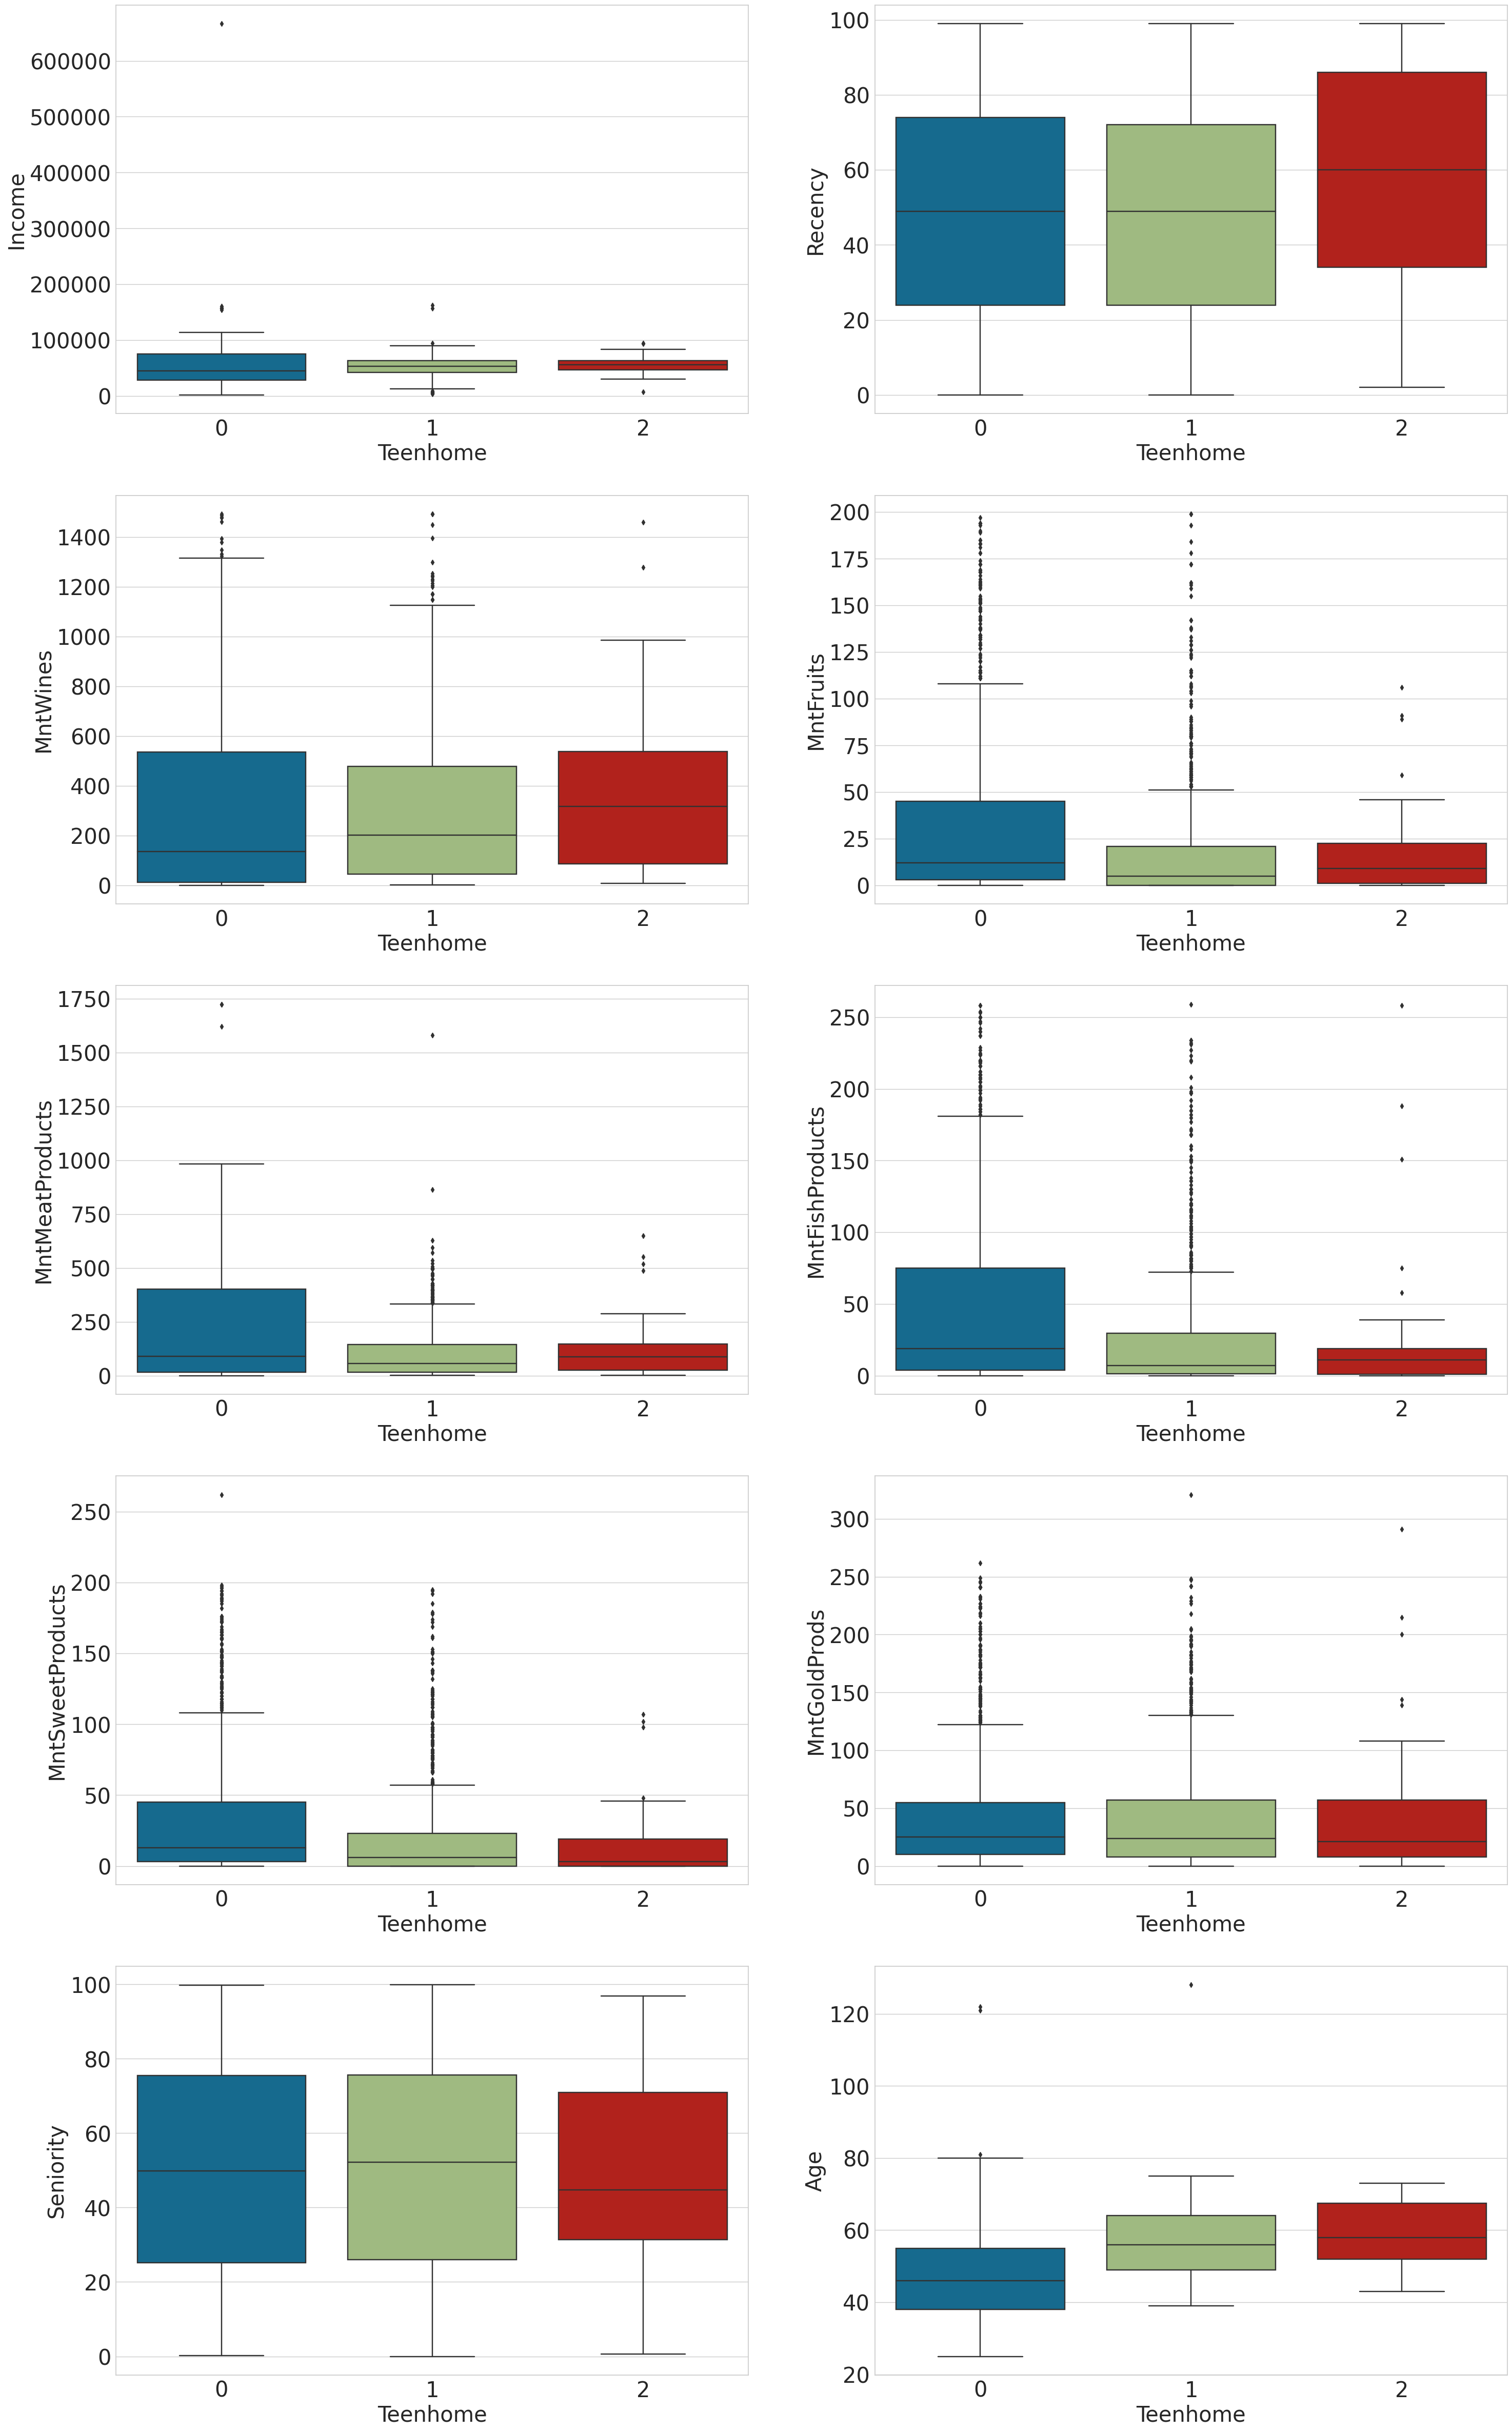

In [24]:
#  Boxplot for all continuous numerical features - by Teen home
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont)//grh_per_row,grh_per_row, figsize = (35, 60))

for count, feature in enumerate(col_cont, 0):
    data_copy= data.copy()
    row =count // grh_per_row
    col=(count )% grh_per_row    
    sns.boxplot(x='Teenhome', y=feature, data=data_copy, ax=ax[row, col])
        
    # Set labels and axis labels font size
    ax[row, col].set_xlabel('Teenhome', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30)

plt.show()

<div style="text-align: center; background-color: #FCFFE9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Discrete Features </h2>
</div>

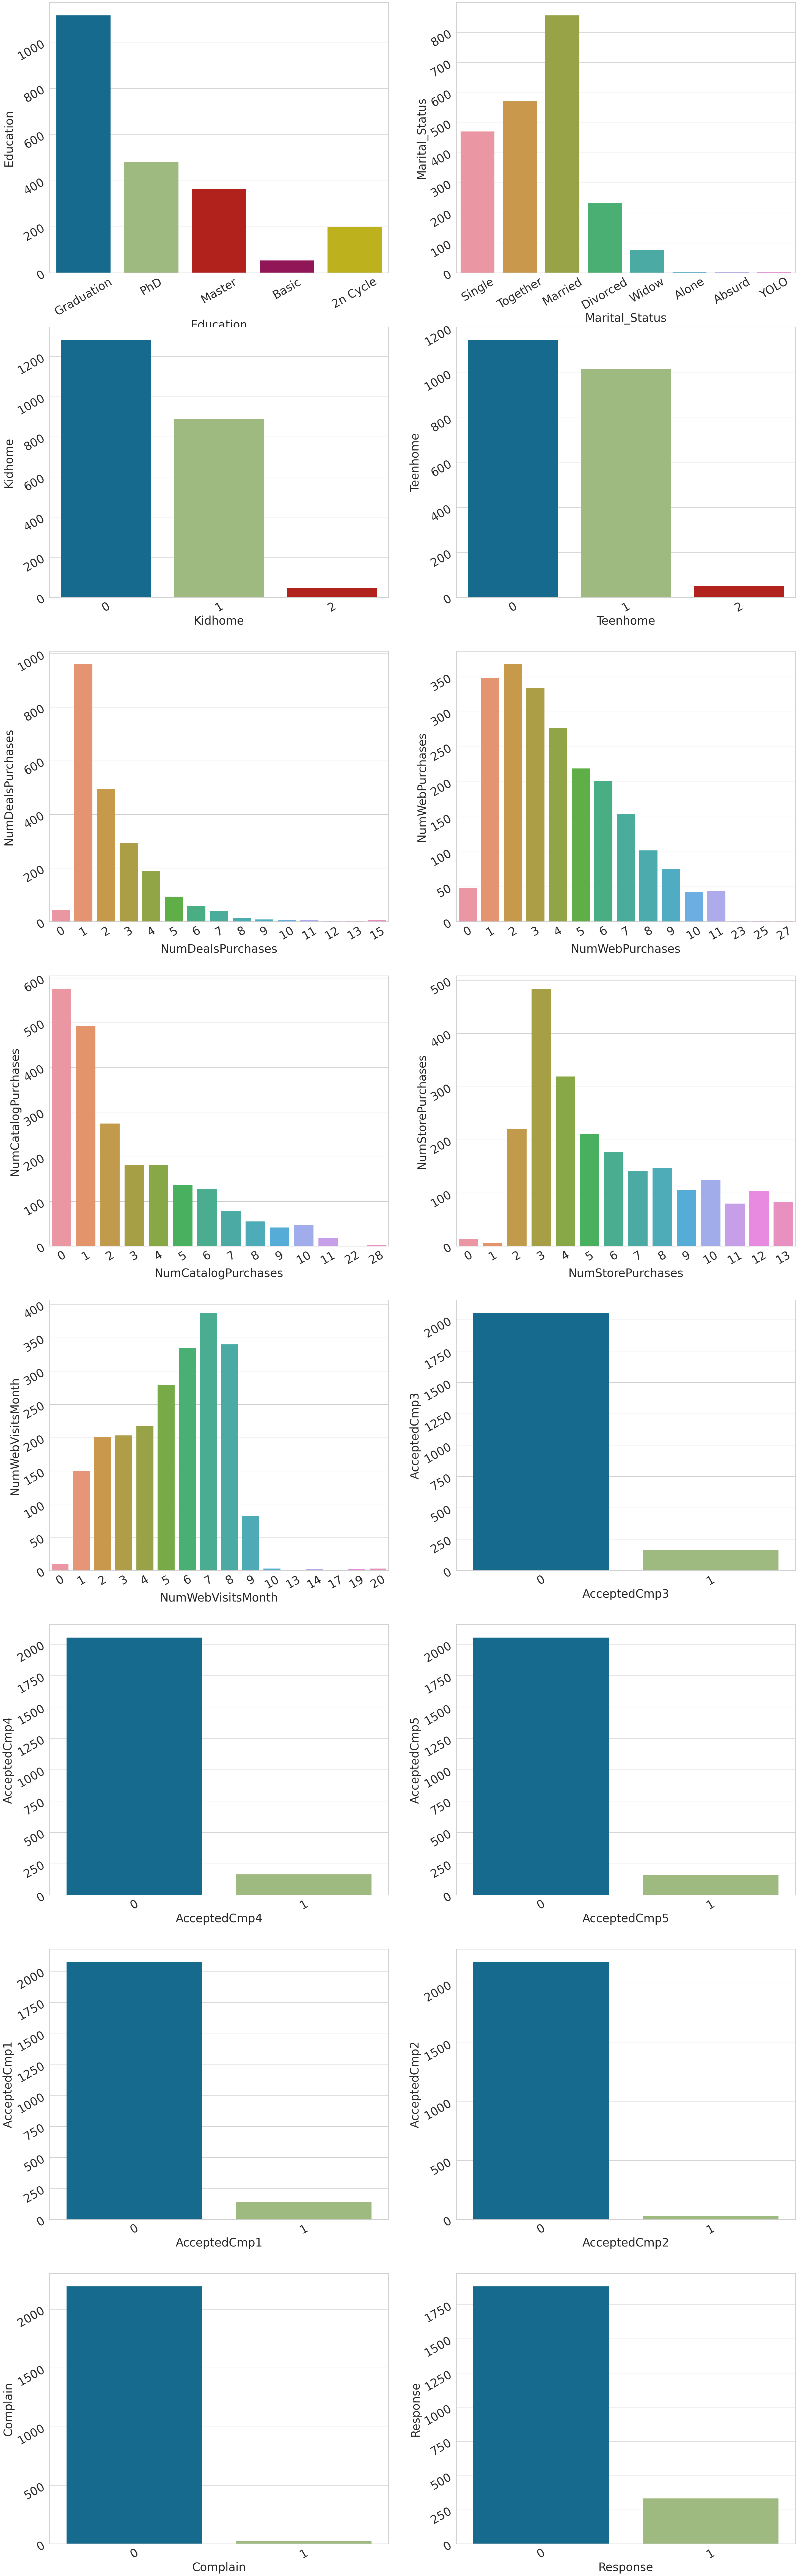

In [25]:
# Countplot for discrete features
grh_per_row = 2
fig, ax = plt.subplots(len(col_dis) // grh_per_row, grh_per_row, figsize=(35, 120))

for count, feature in enumerate(col_dis, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    sns.countplot(x=feature, data=data_copy,  ax=ax[row, col])  # Specify the axis for the countplot
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel("Count") 
    
   # Set labels and axis labels font size
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30, rotation=30)

plt.show()

<div style="background-color: #FFF2CC; padding: 10px;">
<span style="font-size: larger;">
    
#### Distribution plots and statistic table:
  - Most **product sales** in the past 2 years are **heavily concentrated towards the lower end**. This trend is consistent with our initial data inspection. Specifically, the 25th percentile values for wine, meat, gold, fish, fruit,sweets, and are 23, 16, 9,3,1, 1. This suggests that a significant portion of customers made minimal purchases especially toward products other than wine and meat, indicating a **potential lack of repeat visits** or the store **doesn't sell much stuff except wines and meats**. Also, since this project we will use customer segmentation, it's good to keep this in mind and discover later which group contribute this abnormal pattern the most.
    
  - **Wine sales the best** (with mean of 304 and median of 174). The next one is **meat** (mean of 38 and median of 67).
    
  - Overall, the **customers are be mid aged to senior** (interquartile of 45 to 65).
    
    
#### Boxplots:
  - Produce **sales don't differ with education and marital status** too much. In wine sales, phd might spend more but it could relate to their a bit higer income.
    
  - People with **young kid (not teen) seem to spend less on wines**. 
    
  - There are a few **outliers**. (I didn't include outliers with exceptional large meat or sweet purchases because I suspect this is a wine store so those side/small product sales aren't my focus. I may combine or even drop those columns later):
  - 'Income'>600000 
  - 'Age'>100 
    
#### Countplots:
  - Around **65%** of customers **have a partner** (married or together)
    
  - Around **40%** of customers **have kids**.
    
  - A little less than **50%** customers **have teens**.
    
  - **Most people (>95%) at least have one deal purchase** but it concentrates at **1 deal purchase (around 40%)**.
    
  - Overall, people do slightly **more store purchase than than the web. The least one is catalog**.
    
  - Number of **web visits last month** concentrated at the **range of 5-8**.
    
  - Campaign acception rate overall is low.

# <a id="10"></a>
<div style="text-align: center; background-color: #CABD80; font-size:100%; padding: 5px;border-radius:10px 10px;">
    <h1> Part 2: Data preprocessing for modeling</h1>
</div> <a id="1"></a>


#### **Feature selection and transformation**

In [26]:
# Combine Campaingns_Accepted
data["Campaigns_Accepted"] = data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2'] +data['Response']
data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',  'Response'], axis=1, inplace=True)

# Drop purchases other than wines and meats
data.drop(['MntFruits','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

# 'Maritcal_Status' to be bianary
data['Marital_Status']= data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Widow','Single','Divorced'],'Not Coupled')
data['Marital_Status']= data['Marital_Status'].replace(['Married', 'Together'],'Coupled')

#### **Remove Outliers**

In [27]:
# Remove outliers
mask = ( data['Income'] <= 600000) & (data['Age'] <= 100) 
data = data[mask]

# Check record numbers after removel
print('Data shape after removing outliers: ', data.shape)

Data shape after removing outliers:  (2212, 17)


#### **Catogorical label encoding**

In [28]:
# Encode categorical features
categorical_features = ['Education', 'Marital_Status']
le=LabelEncoder()
for i in categorical_features:
    data[i]=data[[i]].apply(le.fit_transform)

#### **Feature Scaling**
I will try both **"MinMax" and "Standard"** and see how they do. 

In [29]:
# Feature Scaling
# MinMax
scaler = MinMaxScaler()
scaler.fit(data)
data_MinMax = pd.DataFrame(scaler.transform(data),columns= data.columns )

# Standard
scaler = StandardScaler()
scaler.fit(data)
data_std = pd.DataFrame(scaler.transform(data),columns= data.columns )

#### **Heatmap** to check correlations

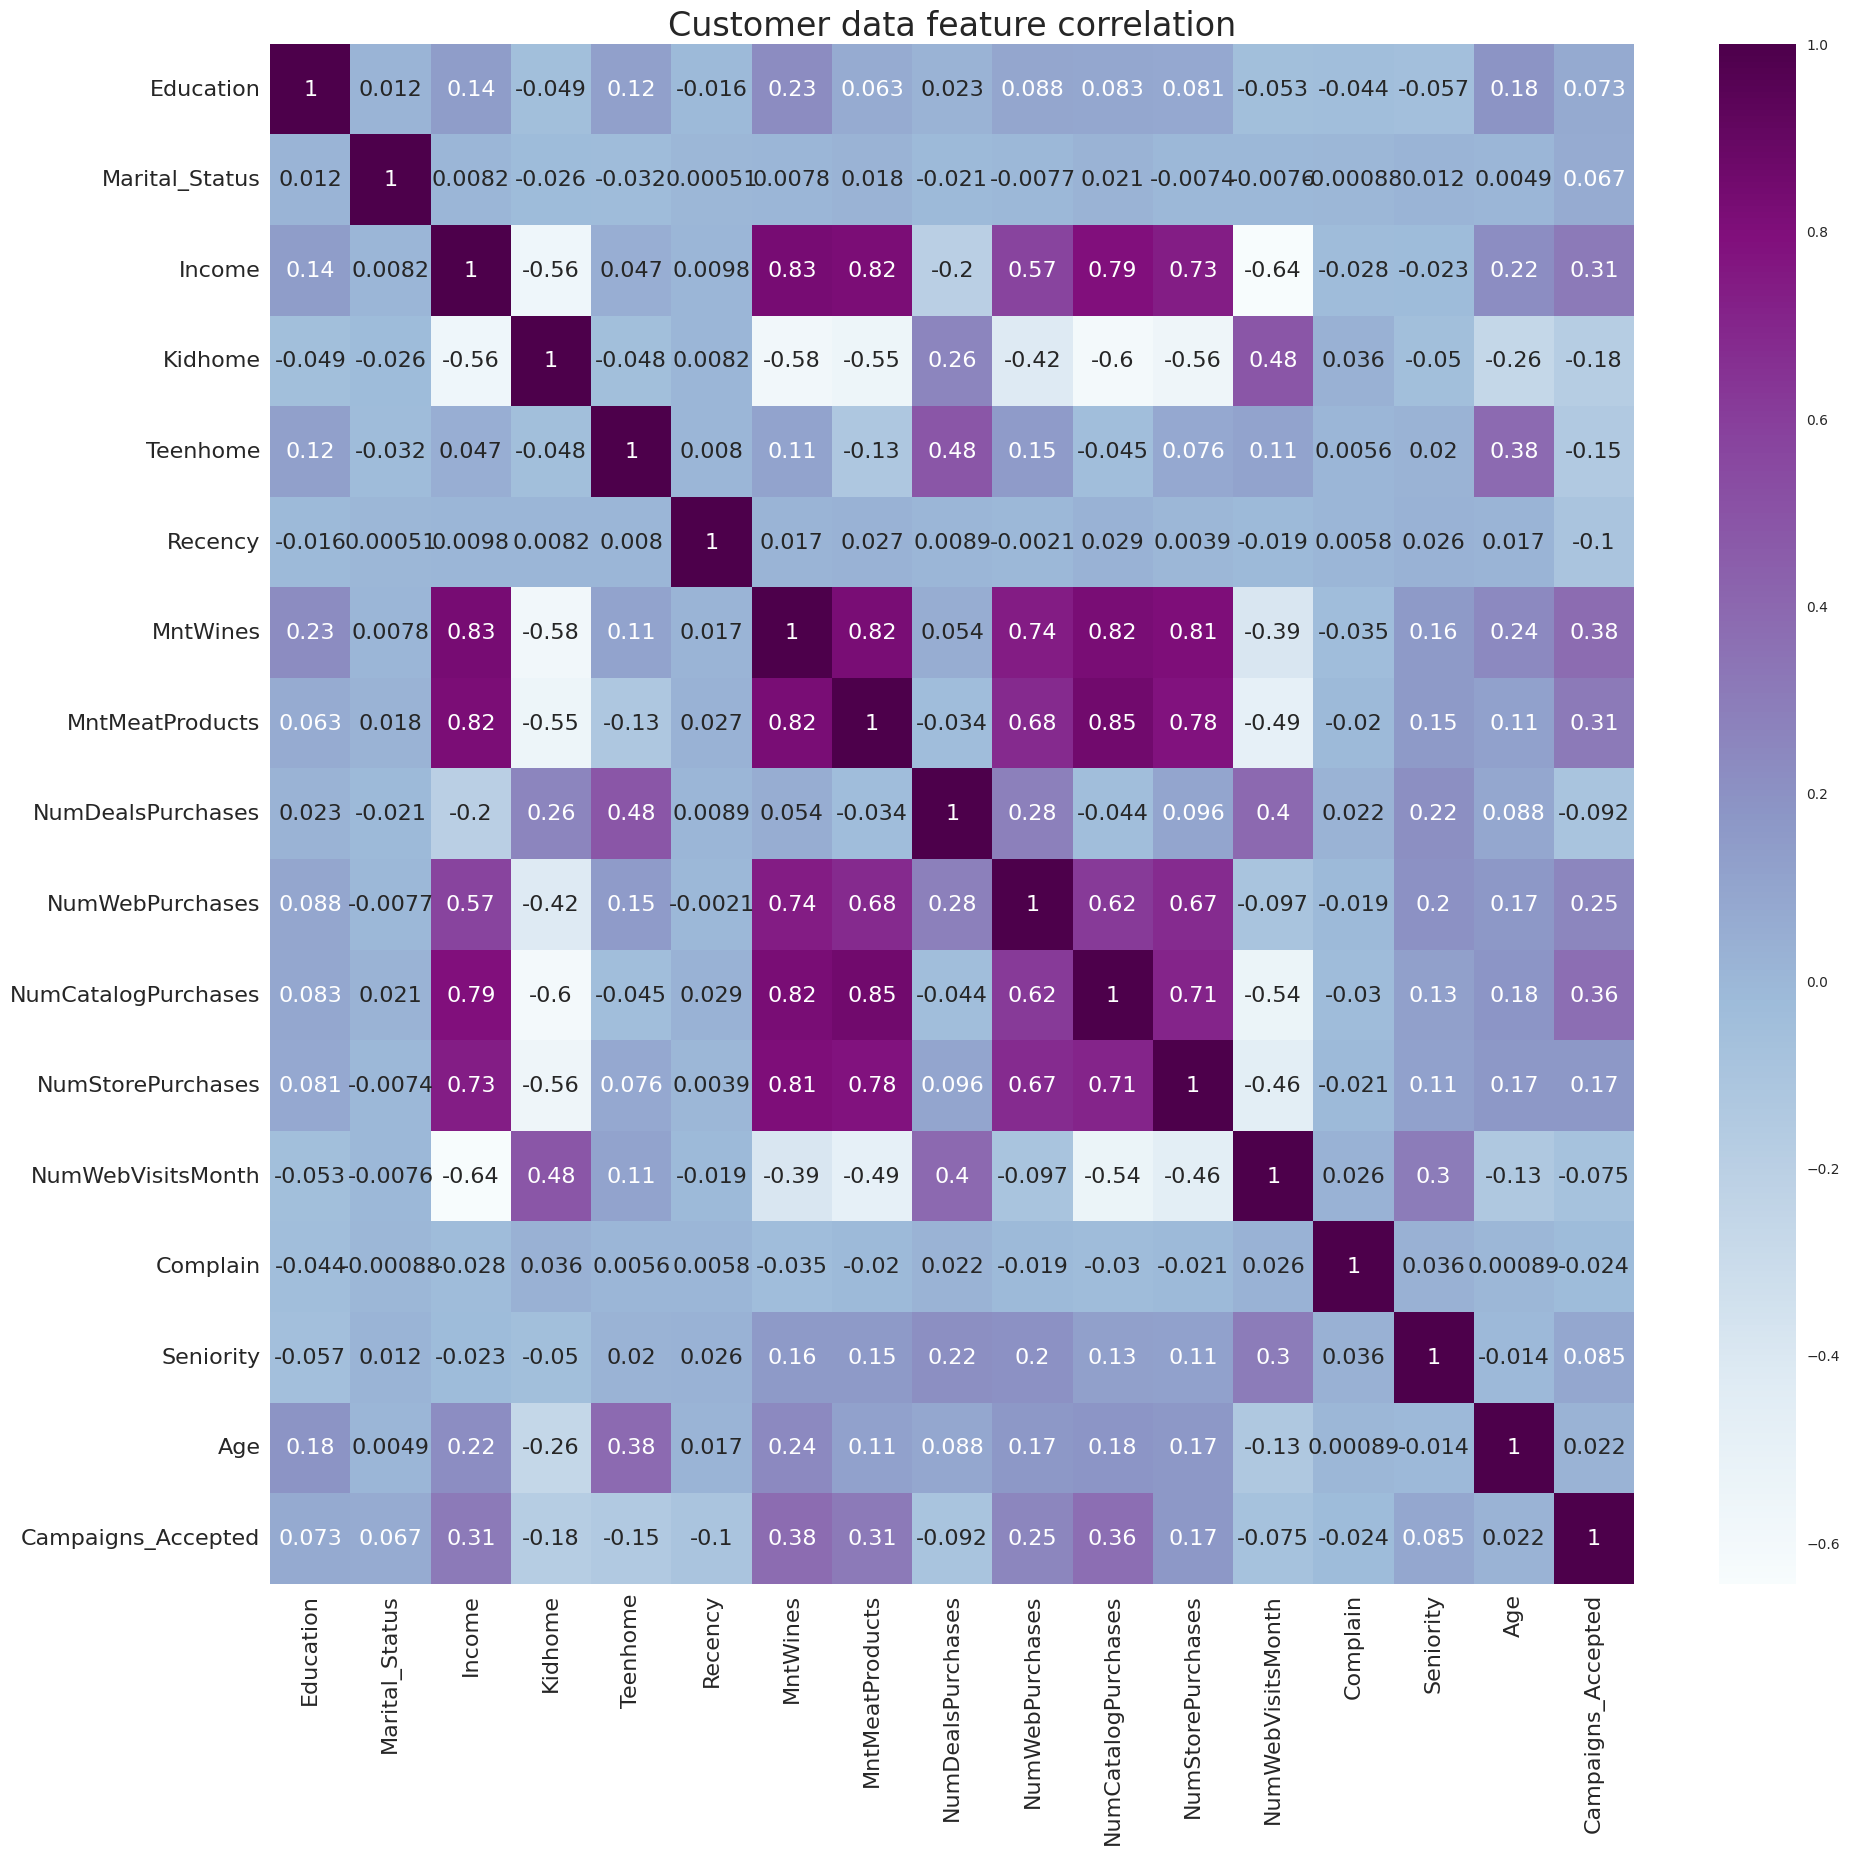

In [30]:
# Now all features are numerical, I can use heatmap to check feature correlations
corr = data.corr(method='spearman')
plt.figure(figsize=(22, 20))
plt.title("Customer data feature correlation", fontsize=24)
sns.heatmap(data=corr, annot=True, cmap="BuPu", annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# <a id="11"></a>
<div style="text-align: center; background-color: #CABD80; font-size:100%; padding: 5px;border-radius:10px 10px;">
    <h1> Part 3: Model building and training</h1>
</div> <a id="1"></a>

# <a id="12"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 3.1: Principal Component Analysis (PCA)</h2>
</div>

# <a id="13"></a>
<div style="text-align: center; background-color: #FDE0D9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 3.1.1: PCA for visualization</h2>
</div>

Let's **build and visualize PCA** for MinMax and Standard scaled data. We will then look at PCA in 2-D and decide which scaling method to use. 

In [31]:
# PCA with 2-D for visualization

# MinMax scaled data
pca_MinMax = PCA(n_components=2)
pca_MinMax.fit(data_MinMax)
PCA_viz_MinMax = pd.DataFrame(pca_MinMax.transform(data_MinMax), columns=(["Dimension 1","Dimension 2"]))

# Standard scaled data
pca_std = PCA(n_components=2)
pca_std.fit(data_std)
PCA_viz_std =    pd.DataFrame(pca_std.transform(data_std), columns=(["Dimension 1","Dimension 2"]))

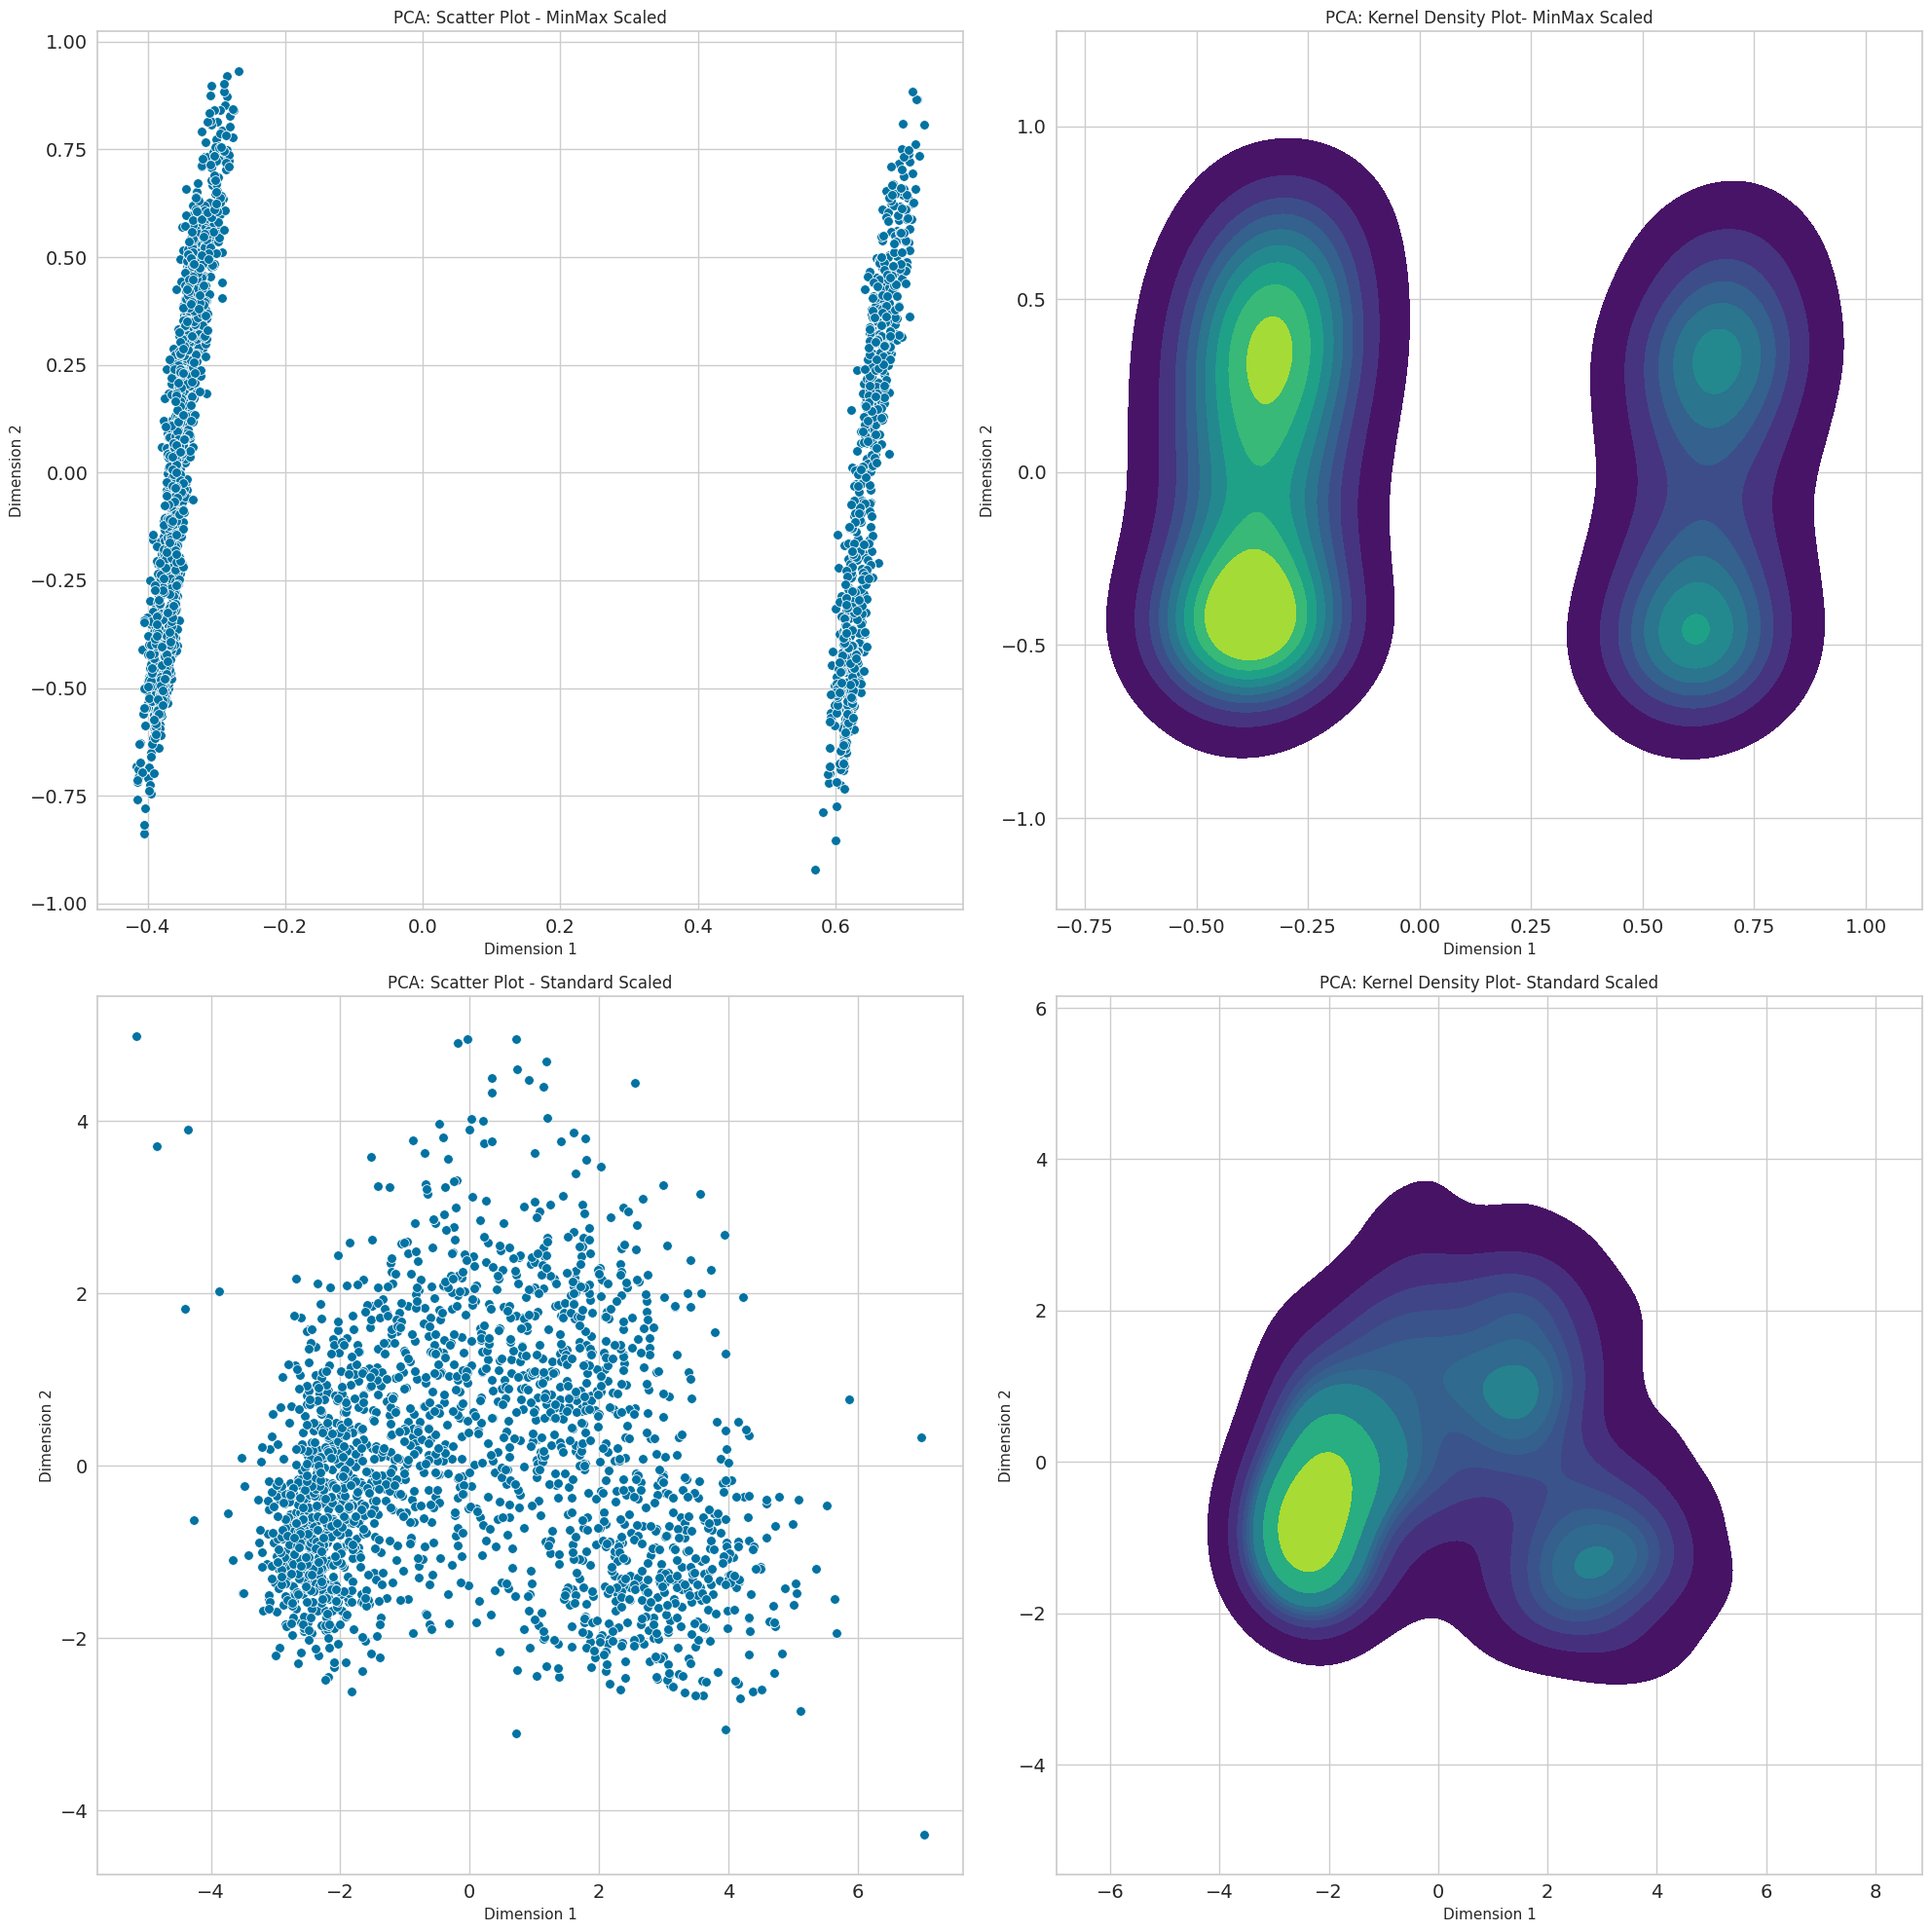

In [32]:
# Visualize data with 2-D PCA with scaled data
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# MinMax scaling
# Scatter plot 
sns.scatterplot(x=PCA_viz_MinMax["Dimension 1"], y=PCA_viz_MinMax["Dimension 2"], ax=axes[0][0])
axes[0][0].set_title('PCA: Scatter Plot - MinMax Scaled')
axes[0][0].set_xlabel('Dimension 1')
axes[0][0].set_ylabel('Dimension 2')

# KDE plot 
sns.kdeplot(x=PCA_viz_MinMax ["Dimension 1"], y=PCA_viz_MinMax["Dimension 2"], cmap='viridis', fill=True, ax=axes[0][1])
axes[0][1].set_title('PCA: Kernel Density Plot- MinMax Scaled')
axes[0][1].set_xlabel('Dimension 1')
axes[0][1].set_ylabel('Dimension 2')

#Standard scaling
# Scatter plot 
sns.scatterplot(x=PCA_viz_std["Dimension 1"], y=PCA_viz_std["Dimension 2"], ax=axes[1][0])
axes[1][0].set_title('PCA: Scatter Plot - Standard Scaled')
axes[1][0].set_xlabel('Dimension 1')
axes[1][0].set_ylabel('Dimension 2')

# KDE plot 
sns.kdeplot(x=PCA_viz_std ["Dimension 1"], y=PCA_viz_std["Dimension 2"], cmap='viridis', fill=True, ax=axes[1][1])
axes[1][1].set_title('PCA: Kernel Density Plot- Standard Scaled')
axes[1][1].set_xlabel('Dimension 1')
axes[1][1].set_ylabel('Dimension 2')

# Adjust ticks font size
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

It seems **MinMax scaling is unsuitable** for this dataset, leading to two distinct clusters with a substantial distance of around 1. This discrepancy is attributed to the way MinMax scaling treats binary features, particularly by maintaining a constant distance of 1 between individuals in different categories.

# <a id="14"></a>
<div style="text-align: center; background-color: #FDE0D9; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 3.1.2: PCA for feature engineering</h2>
</div>

We've chosen the right scaling method. Now, let's discover **how many dimensions we want to keep for PCA**.

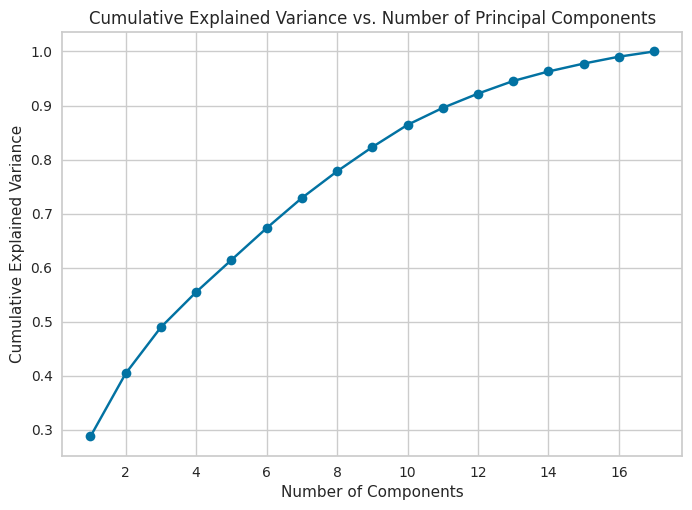

In [33]:
# Let's see %of variance vs. #of principal components we choose
cum_vars=[]
component_coefs=[]
for i in range(1, len(data_std.columns)+1): 
    pca = PCA(n_components=i)
    pca.fit(data_std)

    # Get the cumulative explained variance
    component_coefs.append(pca.components_[i-1,:])
    cum_var = np.cumsum(pca.explained_variance_ratio_)[-1]
    cum_vars.append(cum_var)
    
# Plot cumulative explained variance vs. number of components
plt.plot(range(1, len(data_std.columns)+1), cum_vars, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')

# Show the plot
plt.show()

Okay, seems the variance wouldn't be explained by a few dimensions. Thus, we **can't simply use the variance to choose # of dimensions**. 
In this case, a closer look at **how PCA built each principal components** (hence, the coefficients) would help us the decide. We want the model to include the dimensions that we think are relevant for clustering.

In [34]:
# Extract feature names
feature_names = data_std.columns

# Initialize an empty DataFrame with a multi-index
components_df = pd.DataFrame(index=feature_names)

# Iterate through each principal component
for i, component_coefs in enumerate(pca.components_):
    # Create a DataFrame for the current component
    component_df = pd.DataFrame({f'Coef_Component_{i+1}': component_coefs}, index=feature_names)
    
    # Concatenate the DataFrame to the main DataFrame
    components_df = pd.concat([components_df, component_df], axis=1)


In [35]:
# Take a look at principal components coefficients
components_df.style.background_gradient(cmap='Greys')

# <a id="15"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 3.1: KMeans model building</h2>
</div>

## How many clusters do we want for K-means? Let's use Elbow method to determine.
#### Let's build PCA with 9 dimensions and check 'elbow' picture to decide.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

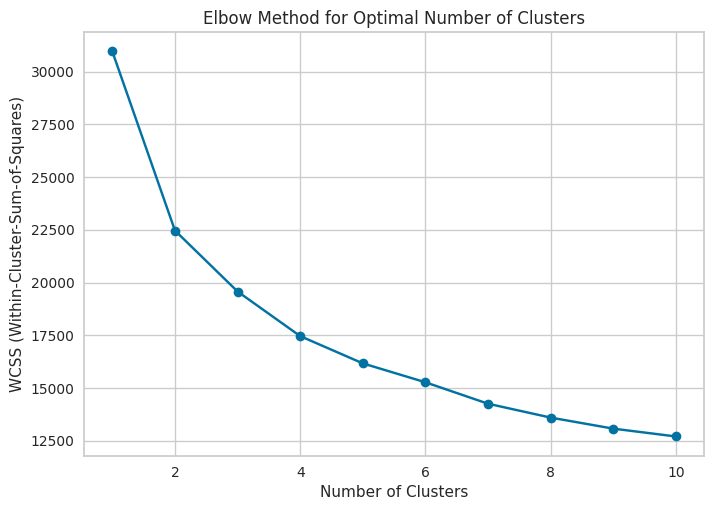

In [36]:
# Elbow method to decide on clustering

# PCA with 9 dimension
pca_std = PCA(n_components=9)
pca_std.fit(data_std)
PCA_std =  pd.DataFrame(pca_std.transform(data_std)) 

# Get within-cluster-sum-of-squares for Elbow Method 
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_std)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

In [37]:
# Run K-means with 3 clusters (and PCA with 9 dimensions)

# PCA 
pca_std = PCA(n_components=9)
pca_std.fit(data_std)
PCA_std =  pd.DataFrame(pca_std.transform(data_std)) 

# Kmeans and predictions
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
yhat_km = kmeans.fit_predict(PCA_std)
data["Clusters"]= yhat_km

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# <a id="16"></a>
<div style="text-align: center; background-color: #CABD80; font-size:100%; padding: 5px;border-radius:10px 10px;">
    <h1> Part 4: Model Evaluations and Interpretations</h1>
</div> <a id="1"></a>


# <a id="17"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 4.1: Model Evaluation</h2>
</div>

### First, let's take a look at clustering groups in 2-D PCA. 

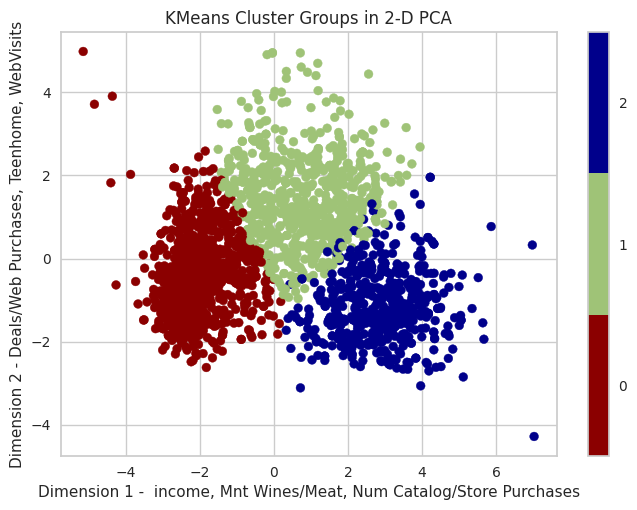

In [38]:
# Plot clustering groups in 2-D PCA

# 2-D PCA
pca_std = PCA(n_components=2)
pca_std.fit(data_std)
PCA_viz_std =    pd.DataFrame(pca_std.transform(data_std), columns=(["Dimension 1","Dimension 2"]))
x, y = PCA_viz_std['Dimension 1'],  PCA_viz_std['Dimension 2']

# Define custom colors and colormap for each cluster
cluster_colors = ['darkred', 'g', 'darkblue']
custom_cmap = ListedColormap(cluster_colors)

# Plotting the clusters in 2D
scatter = plt.scatter(x, y, s=40, c=data["Clusters"], marker='o', cmap=custom_cmap)
plt.title("KMeans Cluster Groups in 2-D PCA")
plt.xlabel('Dimension 1 -  income, Mnt Wines/Meat, Num Catalog/Store Purchases')
plt.ylabel('Dimension 2 - Deals/Web Purchases, Teenhome, WebVisits')

# Adding colorbar with discrete color labels
cbar = plt.colorbar(scatter, ticks=np.arange(len(cluster_colors)), boundaries=np.arange(len(cluster_colors) + 1) - 0.5, orientation='vertical')

plt.show()

There seem to be 3 distinct groups. Let's check how many people are in each clusters next.

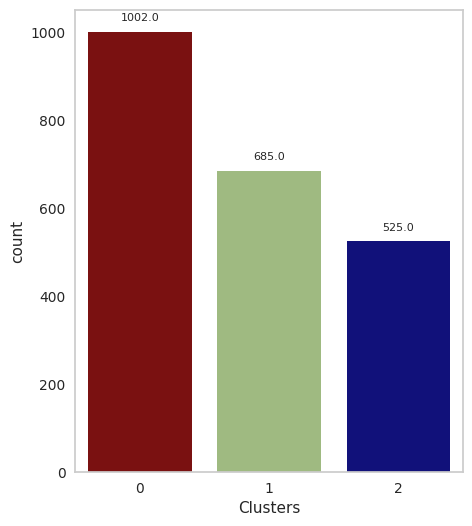

In [39]:
# Create the countplot
custom_palette = {0: 'darkred', 1:'g', 2: 'darkblue'}

plt.figure(figsize=(5, 6))
pl = sns.countplot(x=data["Clusters"], palette=custom_palette)

# Annotate each bar with its count
for p in pl.patches:
    pl.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.grid(False)
plt.show()

# <a id="18"></a>

<div style="text-align: center; background-color: #81badd; font-size:70%; padding: 2px;border-radius:10px;">
    <h2> Part 4.2: Model Interpretation and cluster personality analysis</h2>
</div>

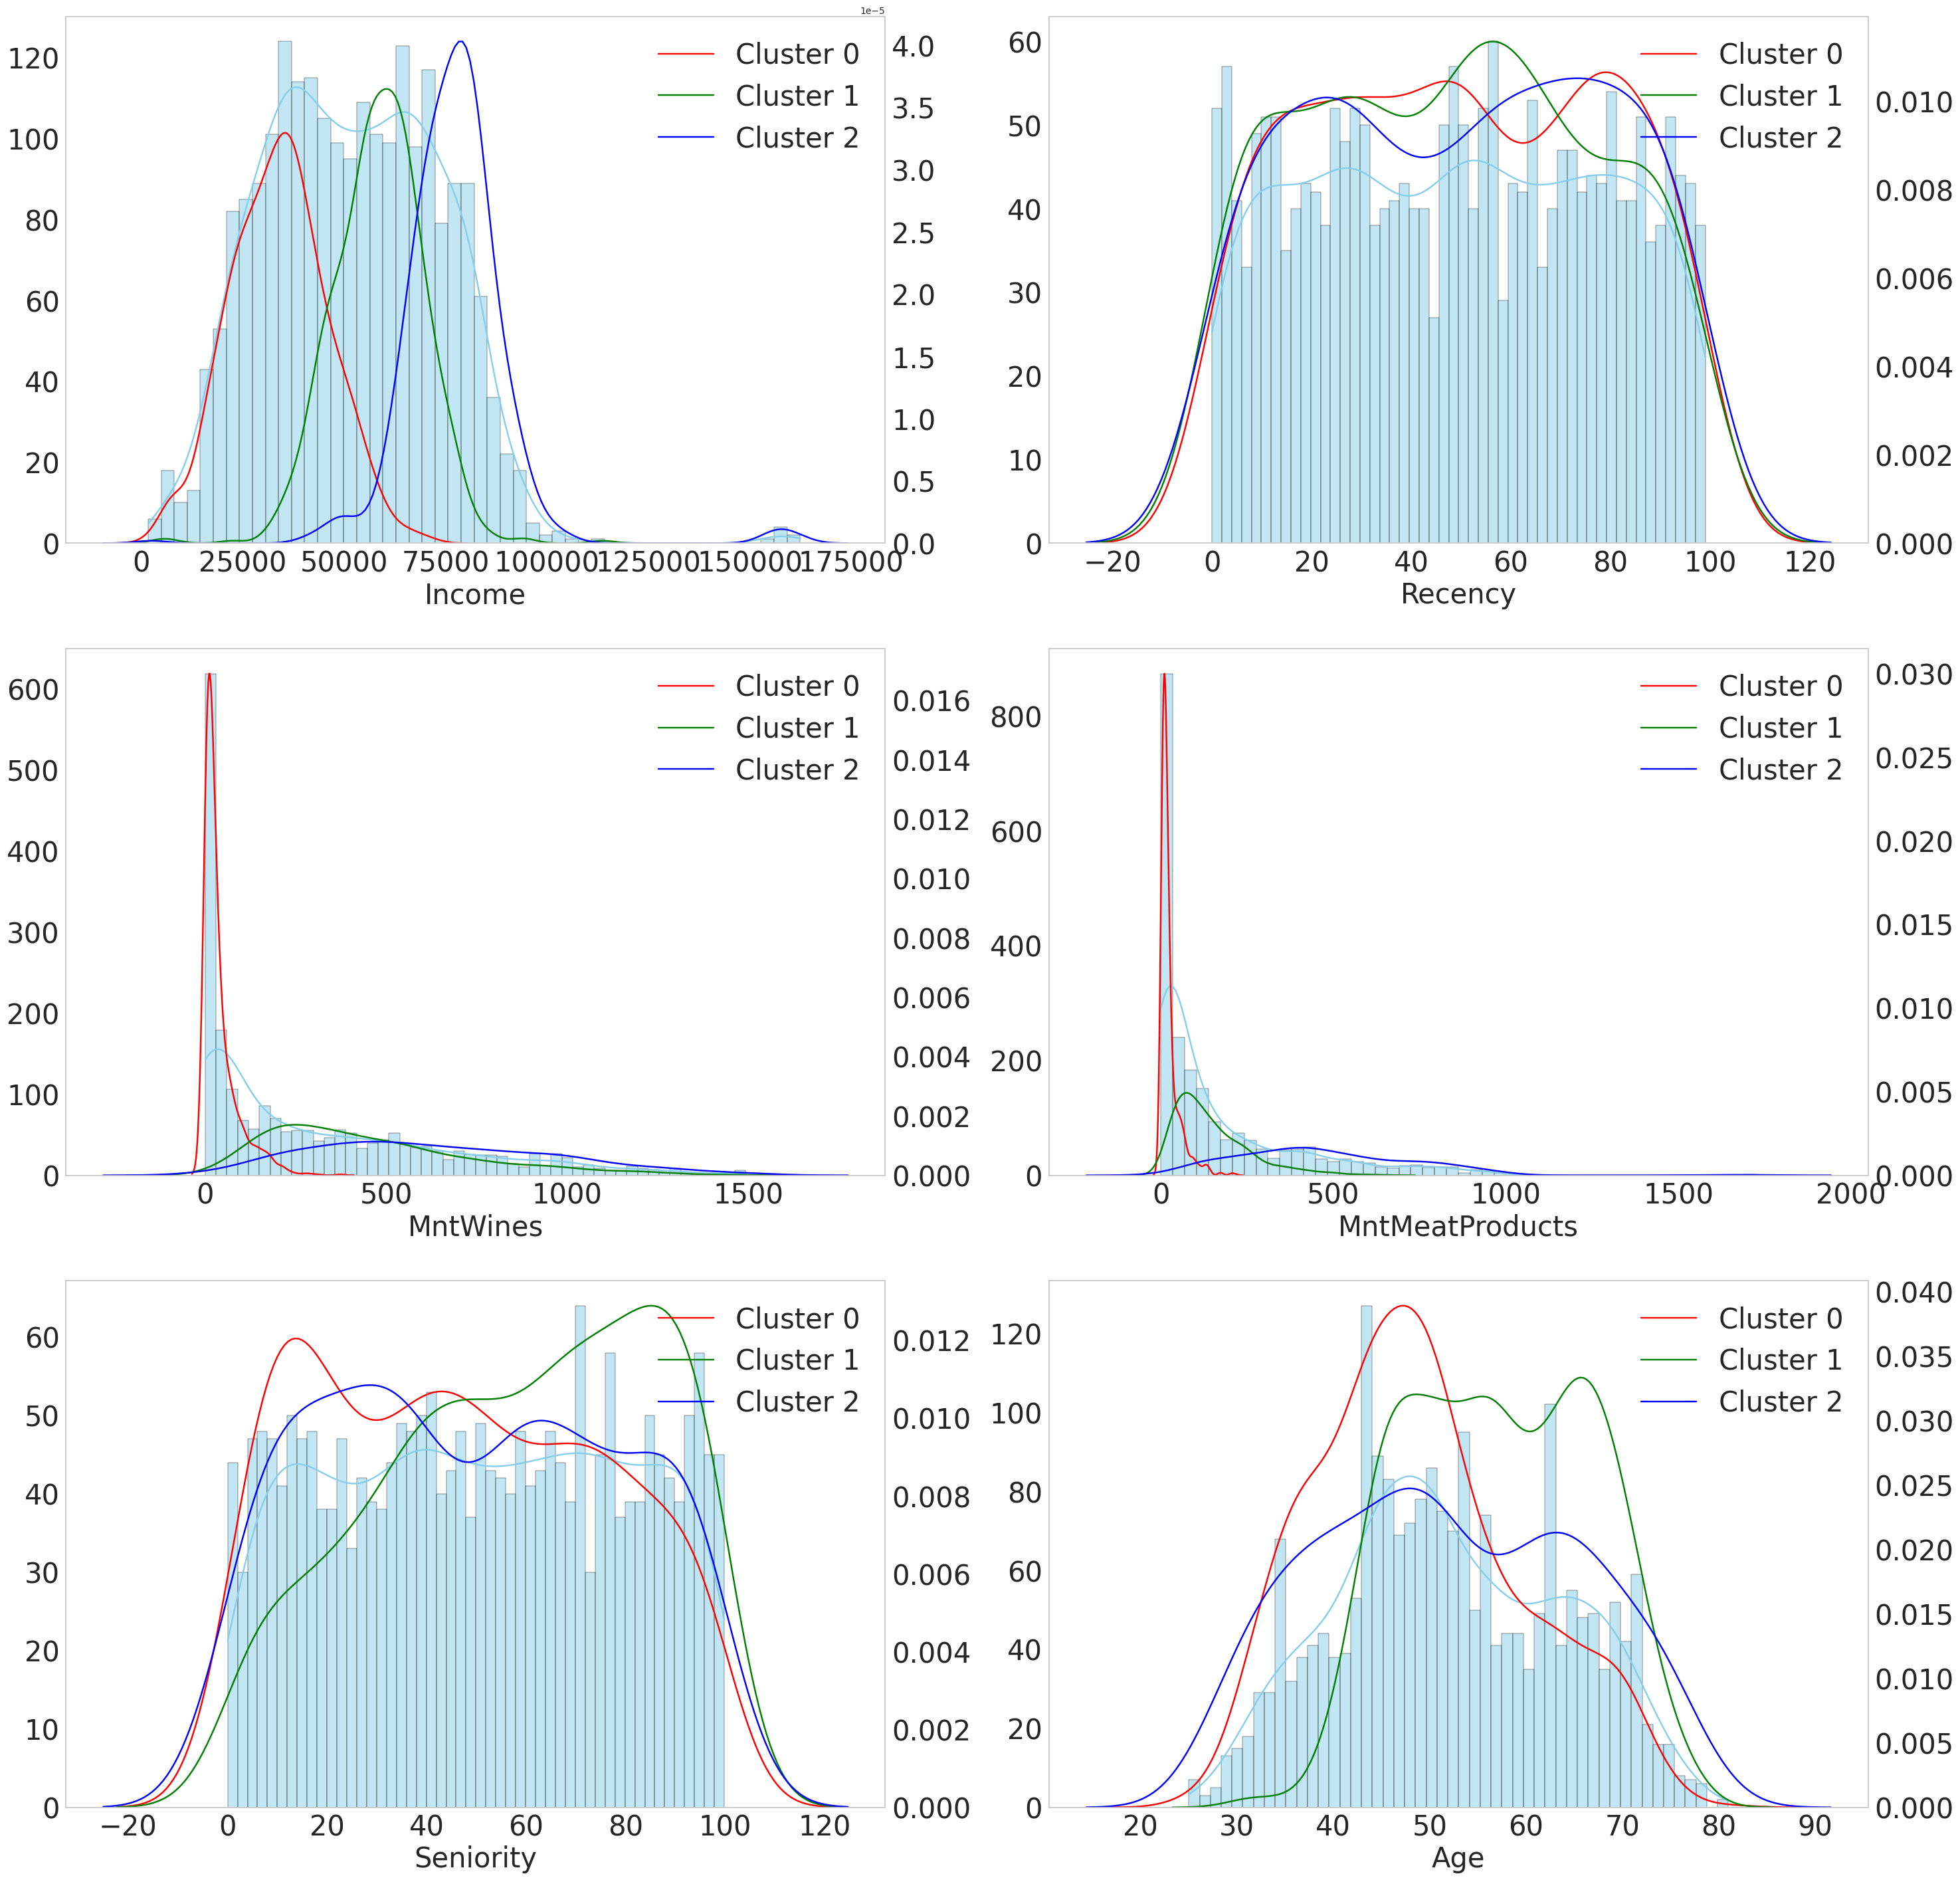

In [40]:
# Divide features again by continuous vs. discrete
col_cont = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'Seniority', 'Age']
col_dis = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Campaigns_Accepted', 'Clusters']

# Histogram and KDE plot for continuous features
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont) // grh_per_row, grh_per_row, figsize=(35, 35))

for count, feature in enumerate(col_cont, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram with KDE on the primary y-axis
    sns.histplot(data_copy, x=feature, bins=50, kde=True, color='skyblue', ax=ax[row, col])
    ax[row, col].grid(False)
    ax[row, col].set_ylabel("")

    # Plot KDE on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(data_copy[data['Clusters'] == 0][feature], color='red', ax=ax2, label='Cluster 0')
    sns.kdeplot(data_copy[data['Clusters'] == 1][feature], color='green', ax=ax2, label='Cluster 1')
    sns.kdeplot(data_copy[data['Clusters'] == 2][feature], color='blue', ax=ax2, label='Cluster 2')
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax2.legend(loc='upper right', fontsize=30)
    ax2.grid(False)
    ax2.set_ylabel("")

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    ax2.tick_params(axis='both', labelsize=30)

plt.show()


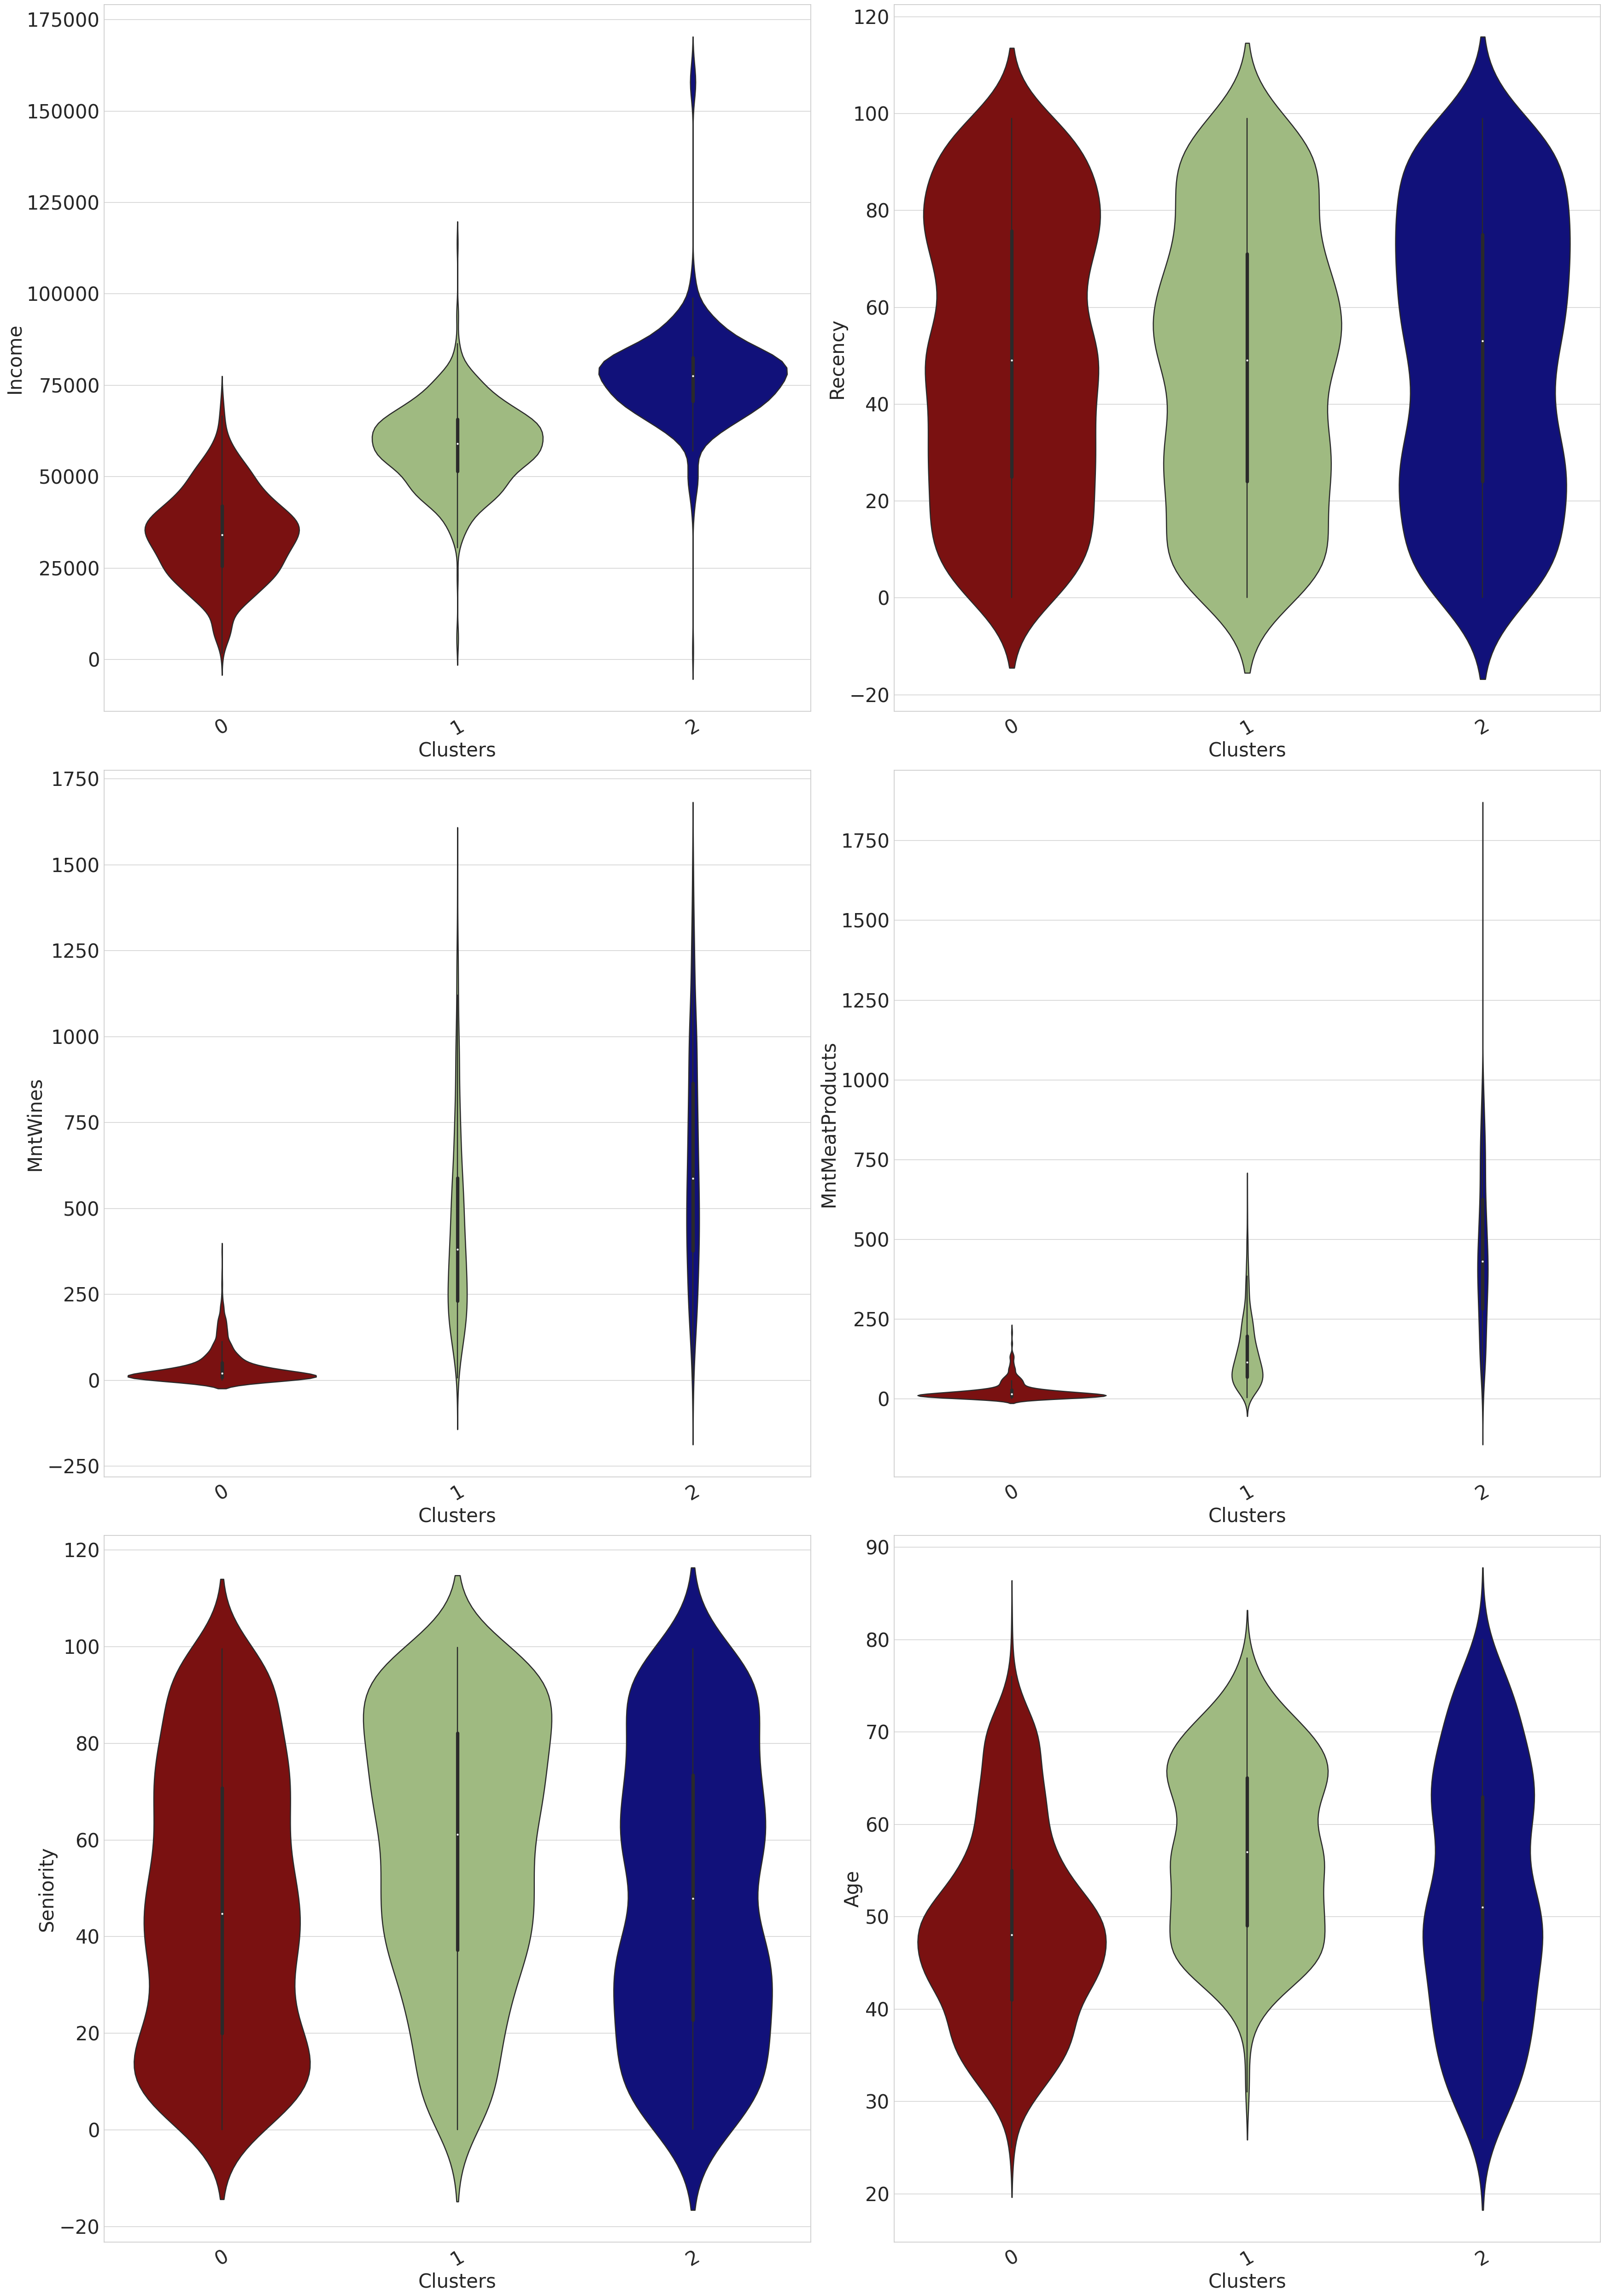

In [41]:
# Violin plot for continuous features
# Number of subplots per row
grh_per_row = 2

# Create subplots
fig, ax = plt.subplots(len(col_cont) // grh_per_row, grh_per_row, figsize=(35, 50))

# Loop through each continuous numerical feature
for count, feature in enumerate(col_cont, 0):
    row = count // grh_per_row
    col = (count) % grh_per_row
    ylim = max(data[feature].max(), abs(data[feature].min()))

    # Plot violin plot with specific colors for each cluster
    sns.violinplot(x='Clusters', y=feature, data=data, ax=ax[row, col], palette={0: 'darkred', 1: 'g', 2: 'darkblue'})
    ax[row, col].tick_params(axis='x', rotation=30)  # Rotate x-axis labels
    ax[row, col].set_title(f'Violin Plot: {feature}')
    ax[row, col].set_title('')

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    ax[row, col].set_xlabel('Clusters', fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)

# Adjust layout
plt.tight_layout()
plt.show()

### See some statistics to to dive in.

In [42]:
data.loc[:, ['Income','Kidhome','Teenhome','Recency',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Greys')


In [43]:
data.loc[:, ["MntWines",'MntMeatProducts',"NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', '25%', '50%', '75%'])].style.background_gradient(cmap='Greys')

In [44]:
data.loc[:, ["NumWebPurchases", "NumWebVisitsMonth",'Complain', 'Seniority', 'Age','Campaigns_Accepted', "Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', '25%', '50%', '75%'])].style.background_gradient(cmap='Greys')

#### A few quick findings - statistics:
- Cluster 1 and 2 mostly (>75%) don't have young kids.
- Income interquartile range for cluster 0,1,2 is around 25-40k, 50-65k, 70-85k. 
- Cluster 1 mostly (>75%) has teen. >50% cluster 0 don't have teen. Cluster 2 mostly (>75%) don't have teen.
- Wine interquartile range for cluster 0,1,2 is around 5-50, 25-600, 350-850. 
- Deal purchase interquartile range for cluster 0,1,2 is around 1-3, 2-5, 1-1. Cluster 1 make the most deal purchases and most cluster 2 (>75%) only have 1 deal purchase.
- Web purchase interquartile range for cluster 0,1,2 is around 1-3, 4-8, 3-6. Cluster 1 make the most web purchases and cluster 0 the least.
- Catalog purchase interquartile range for cluster 0,1,2 is around 0-1, 2-4, 4-8. Cluster 2 make the most catalog purchases and cluster 0 the least.
- Store purchase interquartile range for cluster 0,1,2 is around 3-4, 5-10, 6-10. Cluster 0 and 2 store purchases are very similar and cluster 0 the least.
- Web Visit last month interquartile range for cluster 0,1,2 is around 5-8, 4-7, 1-3. Cluster 0 and 1 web visit are very similar and cluster 2 the least.
- Seniority interquartile range for cluster 0,1,2 is around 20-70, 37-82, 22-73. Cluster 1 has slightly more longtime customer
- Age interquartile range for cluster 0,1,2 is around 40-55, 50-65, 40-63. Cluster 1 are slightly older


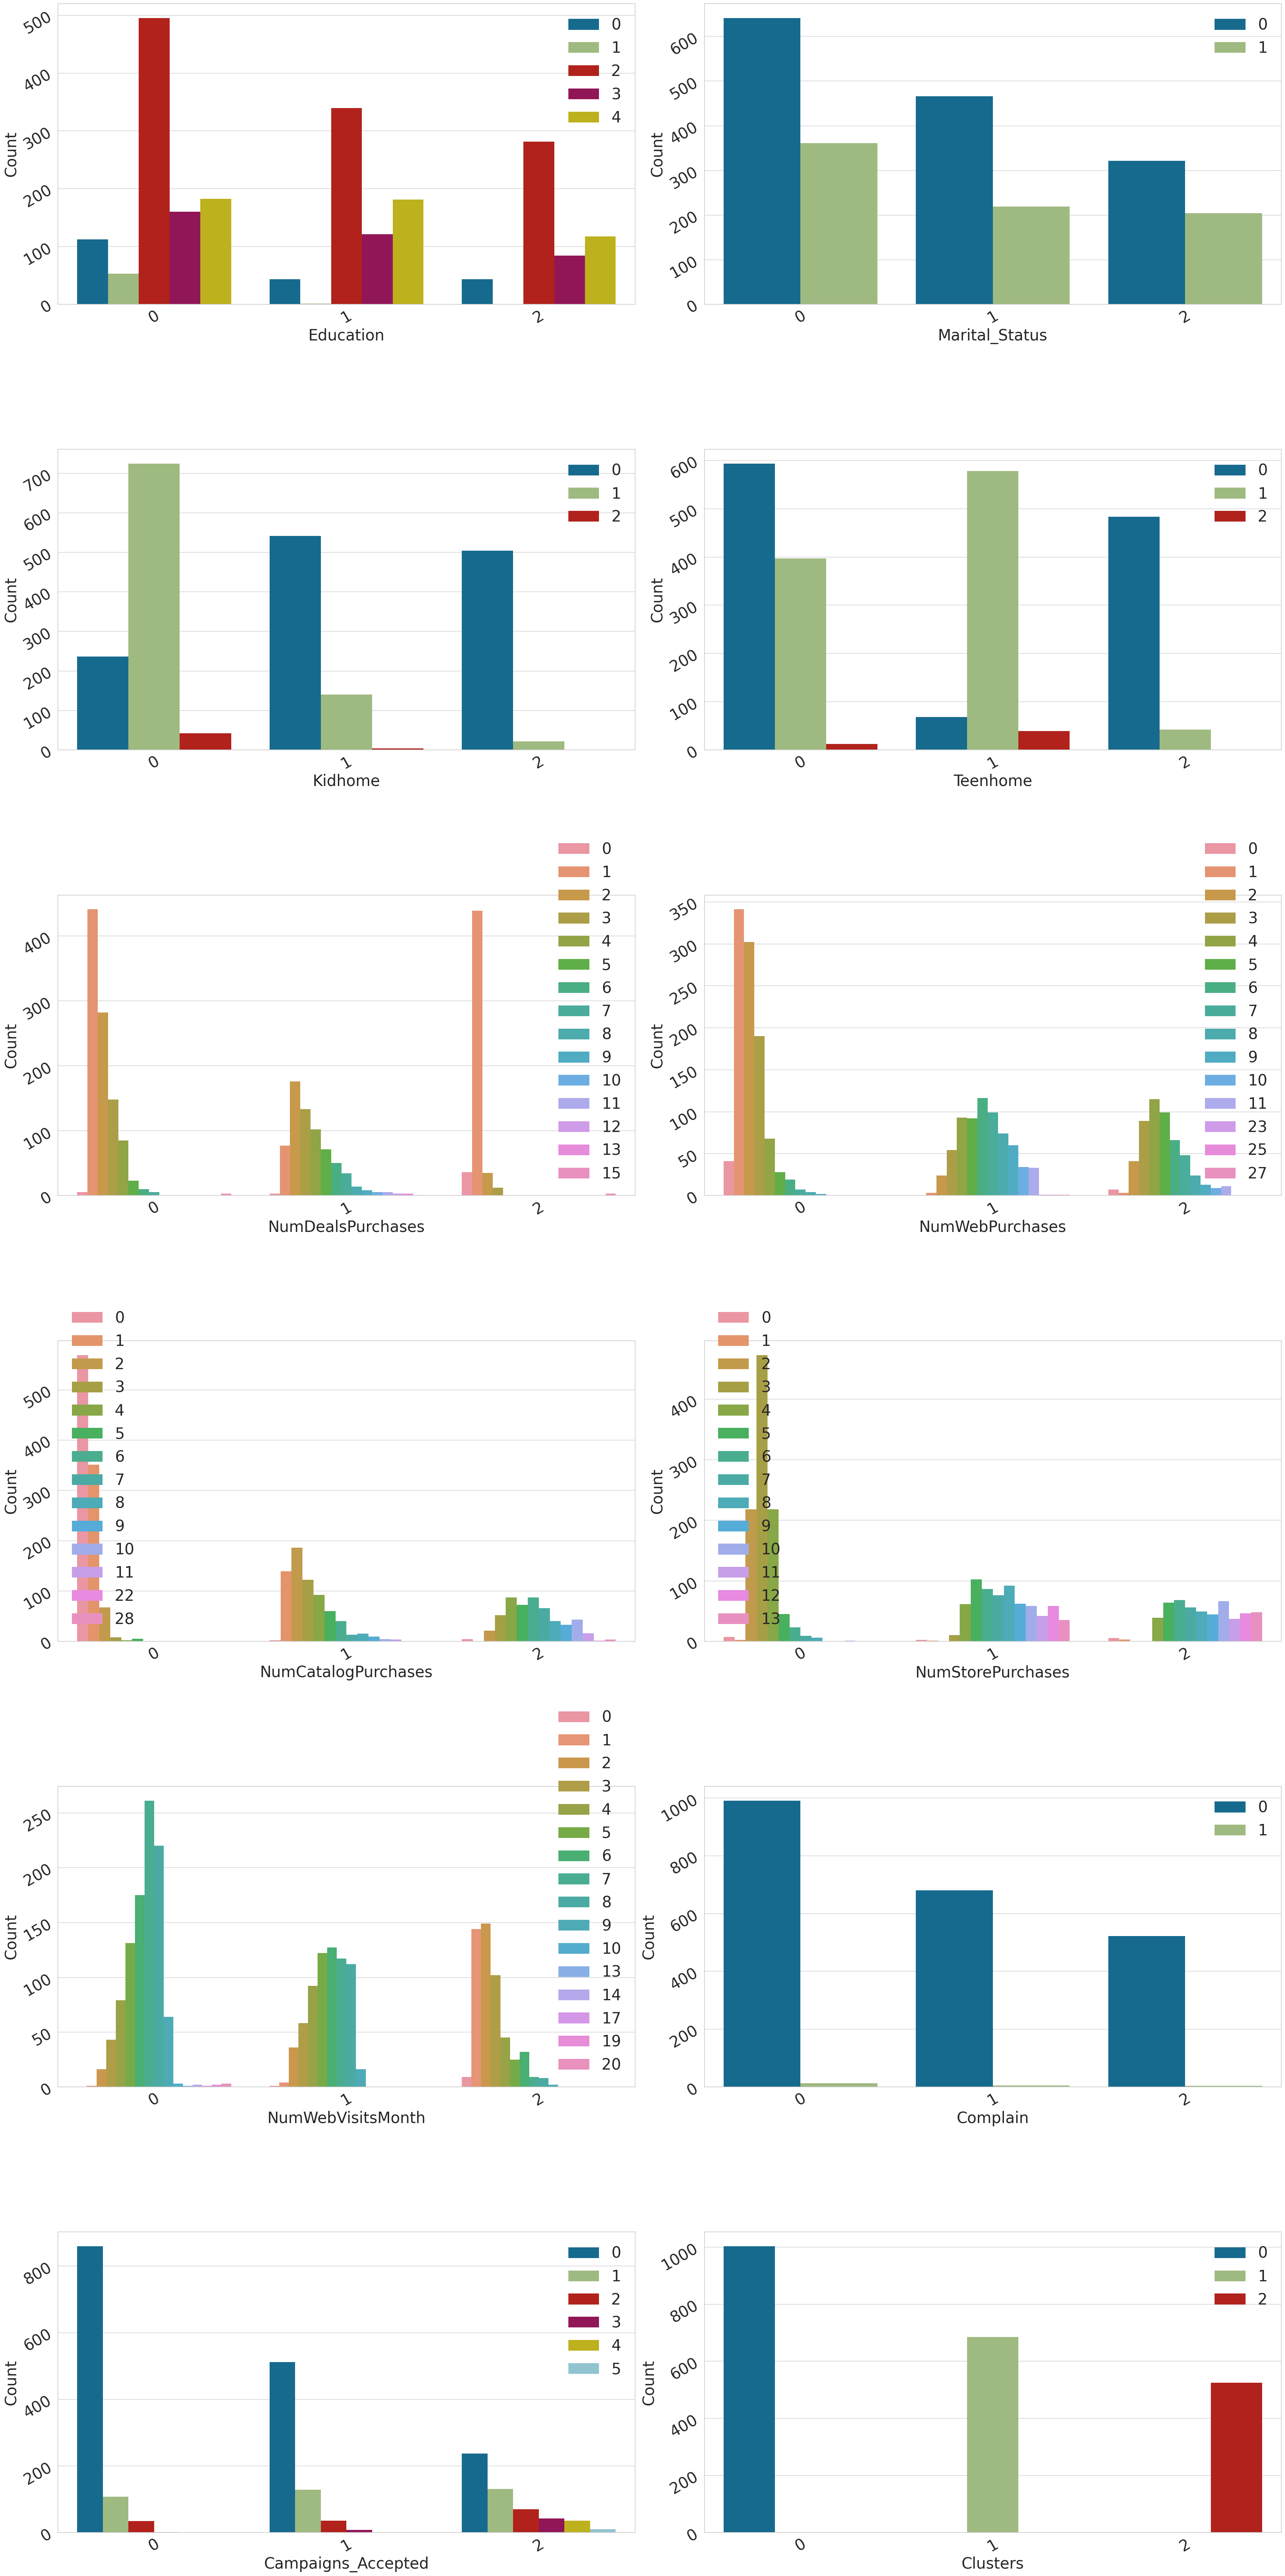

In [45]:
# Countplots for discrete features
grh_per_row = 2
fig, ax = plt.subplots(len(col_dis) // grh_per_row, grh_per_row, figsize=(35, 70))

for count, feature in enumerate(col_dis, 0):
    data_copy = data.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    sns.countplot(x='Clusters', data=data, hue=feature, ax=ax[row, col])  # Specify the axis for the countplot
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax[row, col].set_ylabel("Count", fontsize=30) 
    ax[row, col].tick_params(axis='both', rotation=30, labelsize=30)  # Rotate x-axis labels and adjust label size
    ax[row, col].legend(fontsize=30)  # Set legend label size

# Adjust layout
plt.tight_layout()
plt.show()

#### A few quick findings from counterplots:
- We have lots of cluster 0 people (around 50%)
- Lots of 1-time deal purchase come from cluster 0 and 2 (probably for different reasons). 
- Cluster 1 has more 5+ deal purchases.
- Cluster 2 has more 6+ catalog purchases.
- Most Cluster 1 has 0 campain accepted. A bit more than 50% cluster 2 has 0 campain accepted. But, >50% of people in cluster 2 has more than 1+ campaign accepted. Most people accepted 2+ campaigns are in cluster 2.



